In [2]:

import torch 
import numpy as np
from typing import Sequence

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from data.kernel import *
from data.sampler import *
from data.function import *
from data.evaluation import * 
from policies.pbo import * 
from utils.plot import *
from policies.transformer import * 
import os 
from data.candy_data_handler import * 
from data.sushi_data_handler import * 
%reload_ext autoreload
%autoreload 2

In [ ]:
sampler 

In [7]:
def read_pbo_results(dataname, acq_function_type, dataset_id, num_seed=30, T=30):
    root = f'results/evaluation/{dataname}/{acq_function_type}/{str(dataset_id)}'
    simple_regret, cumulative_regret, inference_time, immediate_regret = list(), list(), list(), list()
    for i in range(num_seed):
        simple_regret.append(torch.load(os.path.join(root, f"simple_regret_{i}.pt"), map_location="cpu")) # (H)
        cumulative_regret.append(torch.load(os.path.join(root, f"cumulative_regret_{i}.pt"), map_location="cpu"))
        inference_time.append(torch.load(os.path.join(root, f"cumulative_inference_time_{i}.pt"), map_location="cpu"))
        immediate_regret.append(torch.load(os.path.join(root, f"immediate_regret_{i}.pt"), map_location="cpu"))
        
    simple_regret = torch.stack(simple_regret) # (num_seeds, H)
    cumulative_regret = torch.stack(cumulative_regret)
    immediate_regret = torch.stack(immediate_regret)
    inference_time = torch.stack(inference_time)
    assert simple_regret.shape == (30, T+1), f"{acq_function_type}, {simple_regret.shape}"
    assert cumulative_regret.shape == (30, T+1), f"{acq_function_type}, {cumulative_regret.shape}"
    assert immediate_regret.shape == (30, T+1), f"{acq_function_type}, {immediate_regret.shape}"
    assert inference_time.shape == (30, T), f"{acq_function_type}, {inference_time.shape}"
    return simple_regret, cumulative_regret, immediate_regret, inference_time
    

In [8]:
def print_pbo_results(dataname, acq_function_type, dataset_id, num_seed=30, T=30):
    root = f'results/evaluation/{dataname}/{acq_function_type}/{str(dataset_id)}'
    dataset_ids = set()
    seed_ids = set()
    for i in range(num_seed):
        if not os.path.exists(os.path.join(root, f"simple_regret_{i}.pt")):
            dataset_ids.add(dataset_id)
            seed_ids.add(i)
    return dataset_ids, seed_ids

In [9]:
def plot_results(results: dict, fig=None, i=0, row=1, col=3, plot_time=True): 
    if fig is None: 
        fig = plt.figure(figsize=(16, 5))
    model_names = list(results.keys())
    
    ax = fig.add_subplot(row, col, i+1)
    plot_metric_along_trajectory(metrics=[results[k]["simple_regret"].mean(dim=1) for k in model_names],
                                 model_names=model_names, 
                                 ax=ax)
    ax.set_yscale("log")
    ax = fig.add_subplot(row, col, i+2)
    plot_metric_along_trajectory(metrics=[results[k]["cumulative_regret"].mean(dim=1) for k in model_names],
                                 model_names=model_names, 
                                 ax=ax)
    ax.set_yscale("log")
    ax = fig.add_subplot(row, col, i+3)
    plot_metric_along_trajectory(metrics=[results[k]["immediate_regret"].mean(dim=1) for k in model_names],
                                 model_names=model_names, 
                                 ax=ax)
    if plot_time:
        ax = fig.add_subplot(row, col, i+3)
        plot_metric_along_trajectory(metrics=[results[k]["inference_time"].mean(dim=1) for k in model_names],
                                    model_names=model_names, 
                                    ax=ax)

PABBO256 tensor(0.1893)


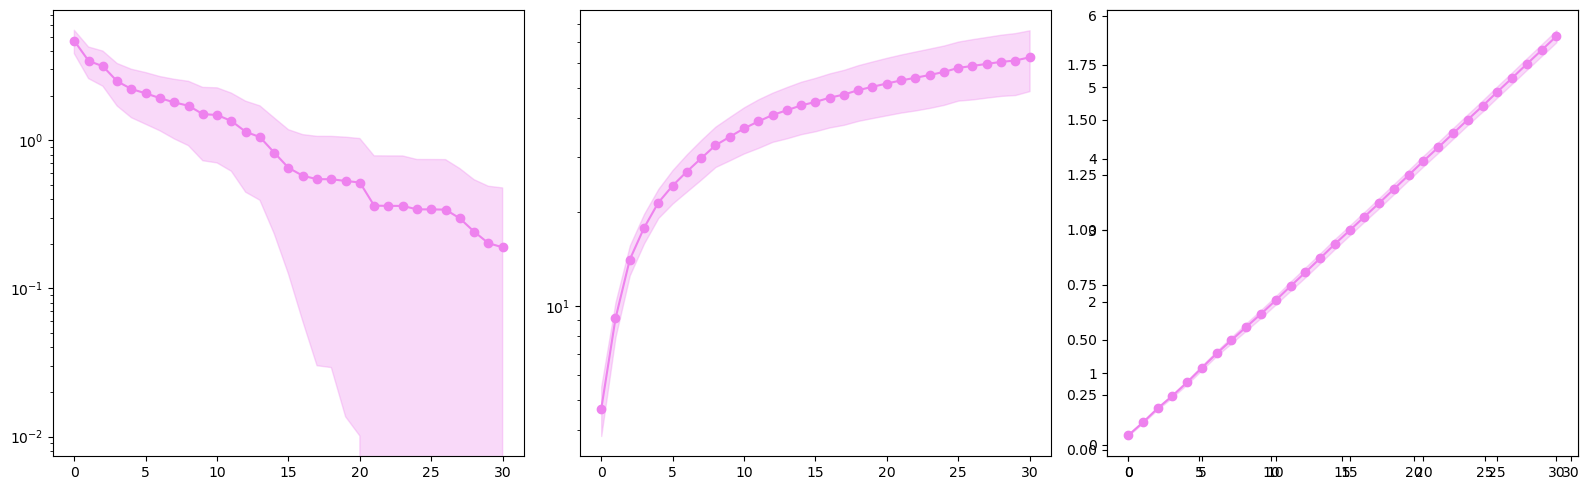

In [27]:
dataname = "forrester1D"
num_dataset=30
models = ["rs", "qEUBO", "qEI", "qTS", "qNEI", "mpes"]
# , "mpes"]
results  = {}
# for acq_function_type in models: 
#     results[acq_function_type] = dict()
#     results[acq_function_type]["simple_regret"]  = list()
#     results[acq_function_type]["immediate_regret"] = list()
#     results[acq_function_type]["cumulative_regret"] = list()
#     results[acq_function_type]["inference_time"] = list()
    
#     for dataset_id in range(num_dataset): 
#         simple_regret, cumulative_regret, immediate_regret, inference_time = read_pbo_results(dataname=dataname, acq_function_type=acq_function_type, dataset_id=dataset_id)
#         results[acq_function_type]["simple_regret"].append(simple_regret)
#         results[acq_function_type]["cumulative_regret"].append(cumulative_regret)
#         results[acq_function_type]["inference_time"].append(inference_time)
#         results[acq_function_type]["immediate_regret"].append(immediate_regret)
    
#     results[acq_function_type]["simple_regret"]  = torch.stack(results[acq_function_type]["simple_regret"], dim=1) # (num_seed, num_dataset, H)
#     results[acq_function_type]["cumulative_regret"] = torch.stack(results[acq_function_type]["cumulative_regret"], dim=1)
#     results[acq_function_type]["inference_time"] = torch.stack(results[acq_function_type]["inference_time"], dim=1)
#     results[acq_function_type]["immediate_regret"] = torch.stack(results[acq_function_type]["immediate_regret"], dim=1)
    
#     # root = f'cleaned_results/{dataname}/{acq_function_type}'
#     # if not os.path.exists(root):
#     #     os.mkdir(root)
#     # torch.save(results[acq_function_type]["simple_regret"], f"{root}/simple_regret.pt")
#     # torch.save(results[acq_function_type]["cumulative_regret"], f"{root}/cumulative_regret.pt")
#     # torch.save(results[acq_function_type]["inference_time"], f"{root}/inference_time.pt")
#     # torch.save(results[acq_function_type]["immediate_regret"], f"{root}/immediate_regret.pt")
    
pabbo = "PABBO_GP1D"
results["PABBO256"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO256"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_S256_B1.pt", map_location="cpu")
results["PABBO256"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_S256_B1.pt", map_location="cpu")
results["PABBO256"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_S256_B1.pt", map_location="cpu")
results["PABBO256"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_S256_B1.pt", map_location="cpu")

for k in results: 
    print(k, results[k]["simple_regret"].squeeze(1).mean(dim=0)[..., -1])
plot_results(results)

In [28]:
for k in results: 
    for id, v in enumerate(results[k]["simple_regret"][..., -1].flatten()): 
        print(id, v.item())

0 1.430511474609375e-05
1 3.0994415283203125e-05
2 0.008404254913330078
3 0.0006394386291503906
4 0.007198333740234375
5 0.01387166976928711
6 1.1826229095458984
7 1.430511474609375e-06
8 0.00109100341796875
9 4.355782985687256
10 0.0068492889404296875
11 0.0004191398620605469
12 0.005577564239501953
13 0.04312610626220703
14 0.011410236358642578
15 0.001476287841796875
16 0.002110004425048828
17 0.00023746490478515625
18 0.0015883445739746094
19 9.5367431640625e-07
20 3.8623809814453125e-05
21 0.0022330284118652344
22 2.384185791015625e-06
23 0.0006070137023925781
24 0.0004215240478515625
25 0.007033348083496094
26 0.004185199737548828
27 2.1457672119140625e-05
28 0.0002522468566894531
29 0.021919727325439453


In [18]:
for k in results: 
    for id, v in enumerate(results[k]["simple_regret"][..., -1].flatten()): 
        print(id, v.item())

0 0.00017023086547851562
1 0.01080322265625
2 0.00017023086547851562
3 0.00017023086547851562
4 0.00017023086547851562
5 0.00017023086547851562
6 0.00017023086547851562
7 0.00017023086547851562
8 0.00017023086547851562
9 0.00017023086547851562
10 0.00017023086547851562
11 0.00017023086547851562
12 0.00017023086547851562
13 0.00017023086547851562
14 0.00017023086547851562
15 0.00017023086547851562
16 5.0349836349487305
17 0.00017023086547851562
18 0.00017023086547851562
19 0.00017023086547851562
20 0.00017023086547851562
21 0.00017023086547851562
22 0.00017023086547851562
23 0.00017023086547851562
24 0.00017023086547851562
25 0.005908489227294922
26 0.00017023086547851562
27 0.00017023086547851562
28 0.00017023086547851562
29 0.005908489227294922


rs tensor([0.0464, 0.0062, 0.0066, 0.0323, 0.0047, 0.0050, 0.0132, 0.0851, 0.0923,
        0.0055, 0.0103, 0.0211, 0.0389, 0.0101, 0.0050, 0.0227, 0.1019, 0.0359,
        0.1000, 0.0245, 0.2626, 0.1497, 0.0033, 0.0222, 0.1022, 0.0076, 0.0500,
        0.0430, 0.0635, 0.0272], dtype=torch.float64)
qEUBO tensor([2.9808e-02, 2.4521e-03, 5.9644e-02, 9.5055e-02, 7.7532e-03, 2.1603e-02,
        7.4677e-03, 1.6240e-01, 4.9291e-01, 2.1799e-03, 7.5047e-04, 1.3974e-02,
        1.6788e-02, 3.4023e-02, 1.5646e-03, 6.7707e-02, 5.4531e-01, 5.8625e-02,
        7.9115e-01, 7.2430e-03, 3.2012e-01, 2.2317e-01, 1.6261e-03, 2.9640e-01,
        5.1353e-02, 1.6667e-02, 2.4163e-01, 5.1463e-01, 2.6342e-02, 1.2339e-01],
       dtype=torch.float64)
qEI tensor([0.0183, 0.0018, 0.0552, 0.0641, 0.0058, 0.0137, 0.0077, 0.1003, 0.4078,
        0.0128, 0.0009, 0.0086, 0.0112, 0.0332, 0.0014, 0.0839, 0.3682, 0.0645,
        0.6792, 0.0054, 0.2813, 0.1321, 0.0010, 0.1350, 0.0260, 0.0092, 0.1095,
        0.0918, 0.0156, 

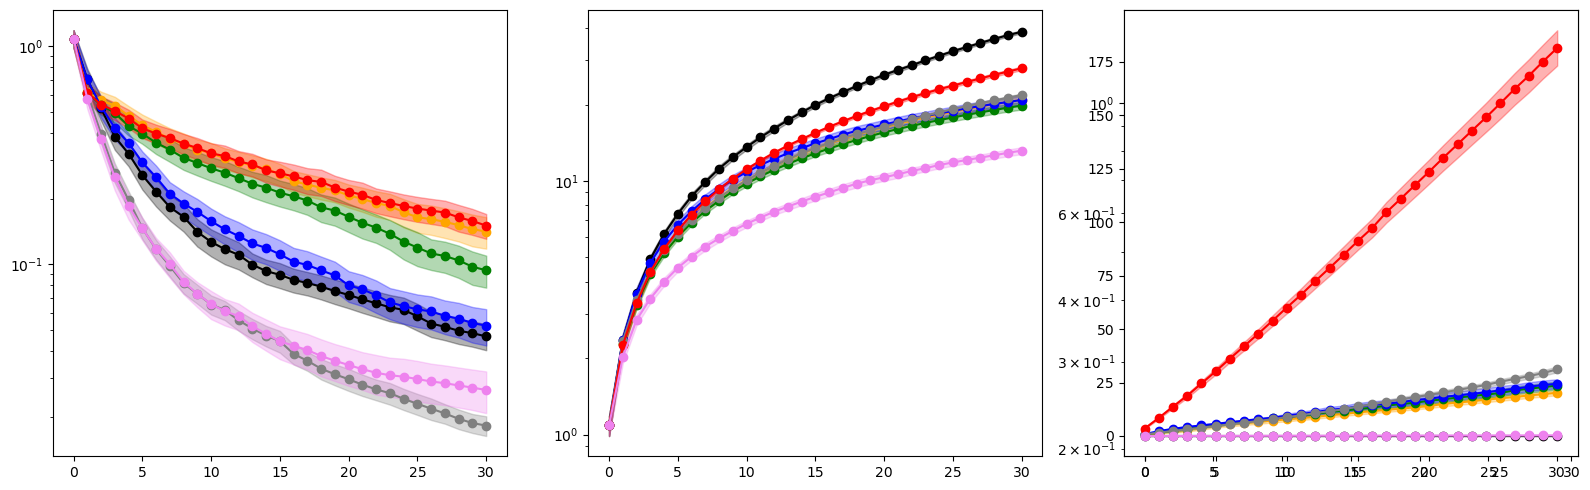

In [7]:
dataname = "GP1D"
num_dataset=30
models = ["rs", "qEUBO", "qEI", "qTS", "qNEI", "mpes"]
# , "mpes"]
results  = {}
for acq_function_type in models: 
    results[acq_function_type] = dict()
    results[acq_function_type]["simple_regret"]  = list()
    results[acq_function_type]["immediate_regret"] = list()
    results[acq_function_type]["cumulative_regret"] = list()
    results[acq_function_type]["inference_time"] = list()
    
    for dataset_id in range(num_dataset): 
        simple_regret, cumulative_regret, immediate_regret, inference_time = read_pbo_results(dataname=dataname, acq_function_type=acq_function_type, dataset_id=dataset_id)
        results[acq_function_type]["simple_regret"].append(simple_regret)
        results[acq_function_type]["cumulative_regret"].append(cumulative_regret)
        results[acq_function_type]["inference_time"].append(inference_time)
        results[acq_function_type]["immediate_regret"].append(immediate_regret)
    
    results[acq_function_type]["simple_regret"]  = torch.stack(results[acq_function_type]["simple_regret"], dim=1) # (num_seed, num_dataset, H)
    results[acq_function_type]["cumulative_regret"] = torch.stack(results[acq_function_type]["cumulative_regret"], dim=1)
    results[acq_function_type]["inference_time"] = torch.stack(results[acq_function_type]["inference_time"], dim=1)
    results[acq_function_type]["immediate_regret"] = torch.stack(results[acq_function_type]["immediate_regret"], dim=1)
    
    # root = f'cleaned_results/{dataname}/{acq_function_type}'
    # if not os.path.exists(root):
    #     os.mkdir(root)
    # torch.save(results[acq_function_type]["simple_regret"], f"{root}/simple_regret.pt")
    # torch.save(results[acq_function_type]["cumulative_regret"], f"{root}/cumulative_regret.pt")
    # torch.save(results[acq_function_type]["inference_time"], f"{root}/inference_time.pt")
    # torch.save(results[acq_function_type]["immediate_regret"], f"{root}/immediate_regret.pt")
    
pabbo = "PABBO_GP1D_T_64_old"
results["PABBO256"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO256"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_256.pt", map_location="cpu")
results["PABBO256"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_256.pt", map_location="cpu")
results["PABBO256"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_256.pt", map_location="cpu")
results["PABBO256"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_256.pt", map_location="cpu")

for k in results: 
    print(k, results[k]["simple_regret"].squeeze(1).mean(dim=0)[..., -1])
plot_results(results)

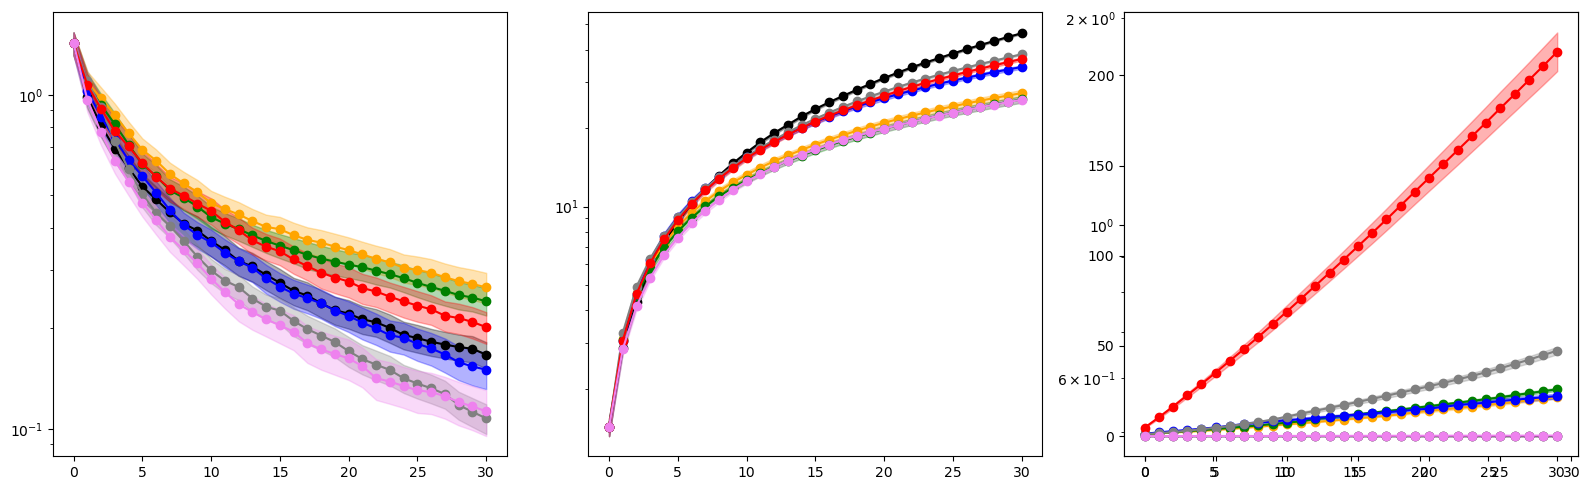

In [73]:
dataname = "GP2D"
num_dataset=30
models = ["rs", "qEUBO", "qEI", "qTS", "qNEI", "mpes"]
results  = {}
for acq_function_type in models: 
    results[acq_function_type] = dict()
    results[acq_function_type]["simple_regret"]  = list()
    results[acq_function_type]["immediate_regret"] = list()
    results[acq_function_type]["cumulative_regret"] = list()
    results[acq_function_type]["inference_time"] = list()
    
    for dataset_id in range(num_dataset): 
        simple_regret, cumulative_regret, immediate_regret, inference_time = read_pbo_results(dataname=dataname, acq_function_type=acq_function_type, dataset_id=dataset_id)
        results[acq_function_type]["simple_regret"].append(simple_regret)
        results[acq_function_type]["cumulative_regret"].append(cumulative_regret)
        results[acq_function_type]["inference_time"].append(inference_time)
        results[acq_function_type]["immediate_regret"].append(immediate_regret)
    
    results[acq_function_type]["simple_regret"]  = torch.stack(results[acq_function_type]["simple_regret"], dim=1) # (num_seed, num_dataset, H)
    results[acq_function_type]["cumulative_regret"] = torch.stack(results[acq_function_type]["cumulative_regret"], dim=1)
    results[acq_function_type]["inference_time"] = torch.stack(results[acq_function_type]["inference_time"], dim=1)
    results[acq_function_type]["immediate_regret"] = torch.stack(results[acq_function_type]["immediate_regret"], dim=1)
    # root = f'cleaned_results/{dataname}/{acq_function_type}'
    # if not os.path.exists(root):
    #     os.mkdir(root)
    # torch.save(results[acq_function_type]["simple_regret"], f"{root}/simple_regret.pt")
    # torch.save(results[acq_function_type]["cumulative_regret"], f"{root}/cumulative_regret.pt")
    # torch.save(results[acq_function_type]["inference_time"], f"{root}/inference_time.pt")
    # torch.save(results[acq_function_type]["immediate_regret"], f"{root}/immediate_regret.pt")
    
pabbo = "PABBO_GP2D_T_64_old"
results["PABBO256"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO256"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_256.pt", map_location="cpu")
results["PABBO256"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_256.pt", map_location="cpu")
results["PABBO256"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_256.pt", map_location="cpu")
results["PABBO256"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_256.pt", map_location="cpu")

plot_results(results)

In [75]:
for k in results: 
    print(k, results[k]["inference_time"].squeeze(1).mean(dim=0)[..., -1])

rs tensor([0.0017, 0.0017, 0.0017, 0.0017, 0.0016, 0.0017, 0.0017, 0.0017, 0.0018,
        0.0017, 0.0017, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0017,
        0.0017, 0.0017, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0017, 0.0018,
        0.0018, 0.0018, 0.0017], dtype=torch.float64)
qEUBO tensor([24.7301, 22.6022, 21.4211, 20.1078, 24.7046, 18.1689, 22.1487, 19.0088,
        21.4141, 26.1212, 24.4637, 22.6615, 21.8814, 32.9642, 24.3442, 20.5675,
        24.9951, 15.5277, 15.1763, 19.9147, 20.3193, 13.7019, 23.9960, 25.4205,
        22.7808, 23.1102, 18.3904, 22.7210, 18.6087, 18.1969],
       dtype=torch.float64)
qEI tensor([26.6682, 23.8182, 22.4902, 22.2624, 33.1105, 21.3777, 21.0404, 20.7415,
        22.3528, 26.4505, 25.1082, 23.2902, 20.9270, 36.6310, 25.7743, 26.8913,
        32.3539, 20.9758, 20.1654, 26.0414, 29.5873, 20.0183, 33.2355, 30.7240,
        29.4920, 31.0222, 24.8430, 28.3860, 28.6555, 24.1204],
       dtype=torch.float64)
qTS tensor([24.7934, 22.9155, 2

In [ ]:
dataname = "GP2D"
fig = plt.figure(figsize=(20, 20))
row=6
col=5
num_dataset=30
models = ["rs", "qEUBO", "qEI", "qTS", "qNEI", "mpes"]
pabbo = "PABBO_GP2D_T_64_old"

root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
pabbo_simple_regret =  torch.load(f"{root}/SIMPLE_REGRET_256.pt", map_location="cpu")
pabbo_inference_time = torch.load(f"{root}/CUMULATIVE_TIME_256.pt", map_location="cpu")
pabbo_cumulative_regret = torch.load(f"{root}/CUMULATIVE_REGRET_256.pt", map_location="cpu")
pabbo_immediate_regret = torch.load(f"{root}/IMMEDIATE_REGRET_256.pt", map_location="cpu")

for dataset_id in range(num_dataset): 
    results  = {}
    results["PABBO256"] = dict()
    results["PABBO256"]["simple_regret"] = pabbo_simple_regret[:, [dataset_id]]
    results["PABBO256"]["inference_time"] = pabbo_inference_time[:, [dataset_id]]
    results["PABBO256"]["cumulative_regret"] = pabbo_cumulative_regret[:, [dataset_id]]
    results["PABBO256"]["immediate_regret"] = pabbo_immediate_regret[:, [dataset_id]]
    for acq_function_type in models: 

        results[acq_function_type] = dict()
        simple_regret, cumulative_regret, immediate_regret, inference_time = read_pbo_results(dataname=dataname, acq_function_type=acq_function_type, dataset_id=dataset_id)
        results[acq_function_type]["simple_regret"] = simple_regret[:, None, :]
        results[acq_function_type]["cumulative_regret"] =cumulative_regret[:, None, :]
        results[acq_function_type]["inference_time"] = inference_time[:, None, :]
        results[acq_function_type]["immediate_regret"] = immediate_regret[:, None, :]
        
    plot_results(results, fig=fig, i=dataset_id, row=row, col=col)
plt.show()

cleaned_results/candy/rs
cleaned_results/candy/qEUBO
cleaned_results/candy/qEI
cleaned_results/candy/qTS
cleaned_results/candy/qNEI
cleaned_results/candy/mpes
cleaned_results/candy/PABBO


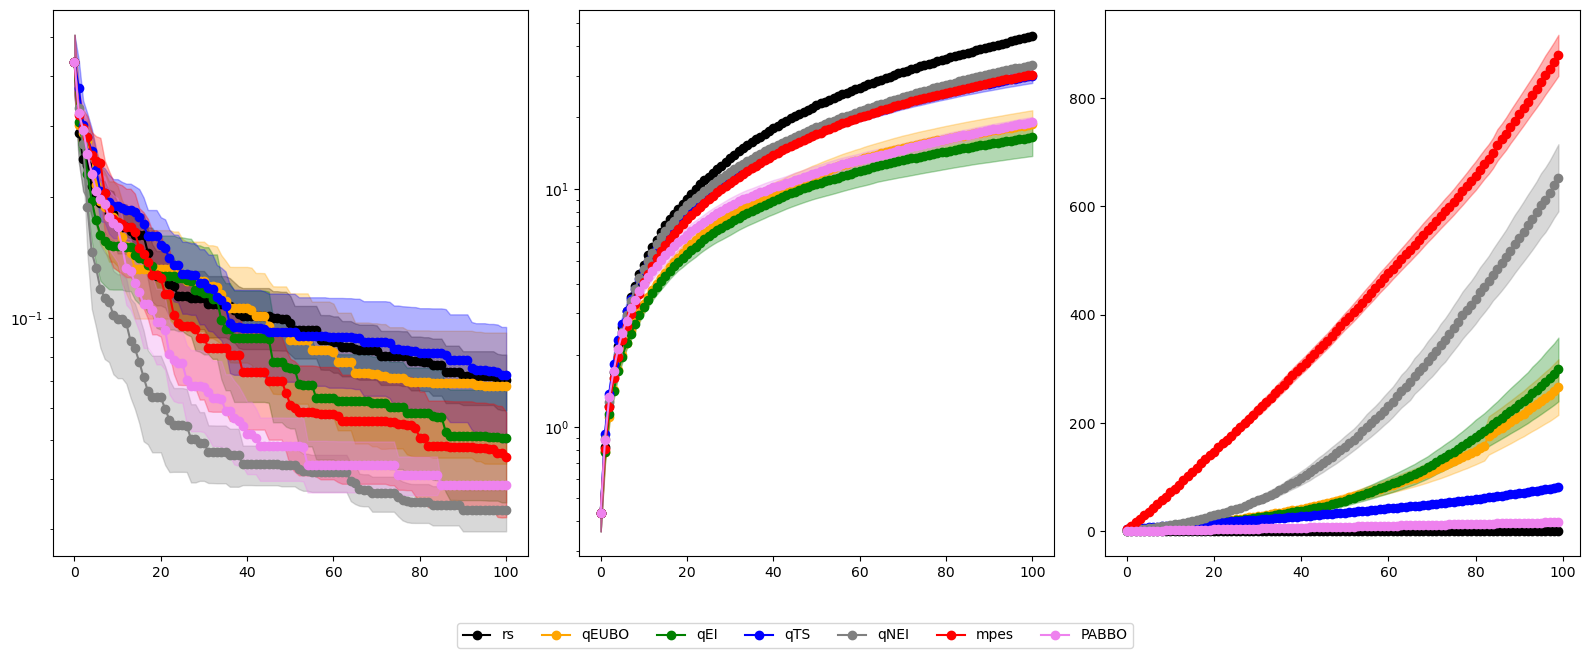

In [30]:
dataname = "candy"
num_dataset=1

models = ["rs", "qEUBO", "qEI", "qTS", "qNEI", "mpes"]
results  = {}
for acq_function_type in models: 
    results[acq_function_type] = dict()
    results[acq_function_type]["simple_regret"]  = list()
    results[acq_function_type]["immediate_regret"] = list()
    results[acq_function_type]["cumulative_regret"] = list()
    results[acq_function_type]["inference_time"] = list()
    
    for dataset_id in range(num_dataset): 
        simple_regret, cumulative_regret, immediate_regret, inference_time = read_pbo_results(dataname=dataname, 
                                                                                              acq_function_type=acq_function_type, 
                                                                                              dataset_id=dataset_id, 
                                                                                              T=100)
        results[acq_function_type]["simple_regret"].append(simple_regret)
        results[acq_function_type]["cumulative_regret"].append(cumulative_regret)
        results[acq_function_type]["inference_time"].append(inference_time)
        results[acq_function_type]["immediate_regret"].append(immediate_regret)
    
    results[acq_function_type]["simple_regret"]  = torch.stack(results[acq_function_type]["simple_regret"], dim=1) # (num_seed, num_dataset, H)
    results[acq_function_type]["cumulative_regret"] = torch.stack(results[acq_function_type]["cumulative_regret"], dim=1)
    results[acq_function_type]["inference_time"] = torch.stack(results[acq_function_type]["inference_time"], dim=1)
    results[acq_function_type]["immediate_regret"] = torch.stack(results[acq_function_type]["immediate_regret"], dim=1)
        

pabbo = "PABBO_GP2D_T_64_old"
# results["PABBO256"] = dict()
# root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
# results["PABBO256"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_256.pt", map_location="cpu")
# results["PABBO256"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_256.pt", map_location="cpu")
# results["PABBO256"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_256.pt", map_location="cpu")
# results["PABBO256"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_256.pt", map_location="cpu")

results["PABBO"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_512.pt", map_location="cpu")
results["PABBO"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_512.pt", map_location="cpu")
results["PABBO"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_512.pt", map_location="cpu")
results["PABBO"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_512.pt", map_location="cpu")

# results["PABBO256_5"] = dict()
# root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
# results["PABBO256_5"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_256_5.pt", map_location="cpu")
# results["PABBO256_5"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_256_5.pt", map_location="cpu")
# results["PABBO256_5"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_256_5.pt", map_location="cpu")
# results["PABBO256_5"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_256_5.pt", map_location="cpu")

for k in list(results.keys()): 
    root = f'cleaned_results/{dataname}/{k}'
    print(root)
    if not os.path.exists(root):
        os.mkdir(root)
    torch.save(results[k]["simple_regret"].mean(dim=1), f"{root}/simple_regret.pt")
    torch.save(results[k]["cumulative_regret"].mean(dim=1), f"{root}/cumulative_regret.pt")
    torch.save(results[k]["inference_time"].mean(dim=1), f"{root}/inference_time.pt")
    torch.save(results[k]["immediate_regret"].mean(dim=1), f"{root}/immediate_regret.pt")
    
fig = plt.figure(figsize=(16, 6))
plot_results(results, fig=fig, col=3, plot_time=True)
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(results), bbox_to_anchor=(0.5, -0.1))
plt.show()

In [36]:
# res = {}
# model_names = list(results.keys())
# for k in model_names:
#     root = f'cleaned_results/candy/{k}'
#     res[k]={}
#     for filename in os.listdir(root):
#         res[k][filename.split('.')[0]] = torch.load(f"{root}/{filename}", map_location="cpu")

# fig = plt.figure(figsize=(16, 6))

# # simple regret of shape (num_seeds, H)
# ax = fig.add_subplot(1, 2, 1)
# plot_metric_along_trajectory(metrics=[res[k]["simple_regret"] for k in model_names], 
#                                  model_names=model_names,
#                                  ax=ax)
# ax.set_yscale("log")

# # cumulative regret of shape (num_seeds, H)
# ax = fig.add_subplot(1,2, 2)
# plot_metric_along_trajectory(metrics=[res[k]["cumulative_regret"] for k in model_names],
#                                  model_names=model_names,
#                                  ax=ax)
# ax.set_yscale("log")

# handles, labels = plt.gca().get_legend_handles_labels()
# fig.legend(handles, labels, loc='lower center', ncol=len(res), bbox_to_anchor=(0.5, -0.1))
# plt.show()

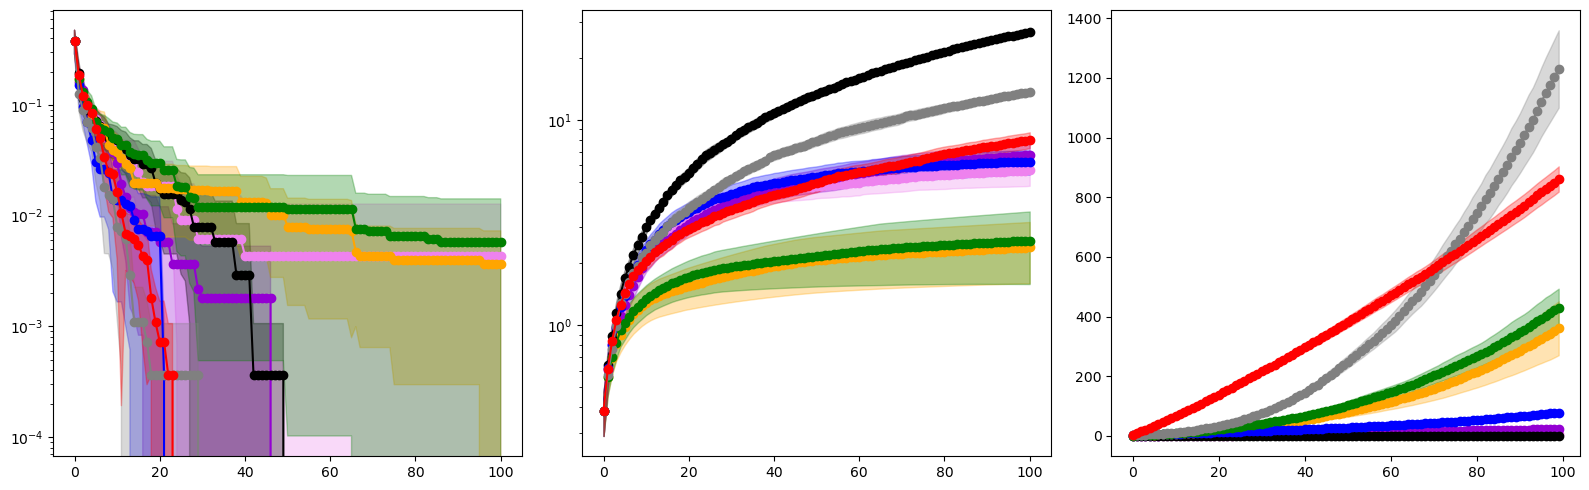

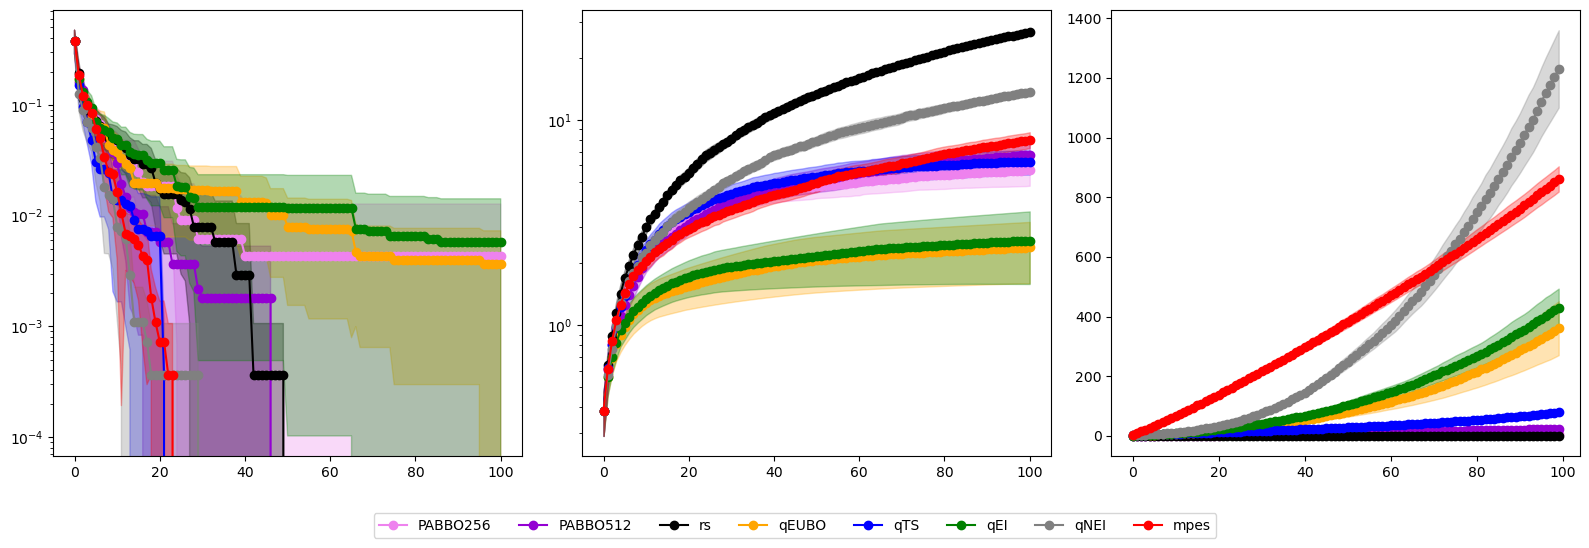

In [30]:
dataname = "sushi"
num_dataset=1

models = ["rs", "qEUBO", "qTS", "qEI", "qNEI", "mpes"]
# results  = {}
for acq_function_type in models: 
    results[acq_function_type] = dict()
    results[acq_function_type]["simple_regret"]  = list()
    results[acq_function_type]["immediate_regret"] = list()
    results[acq_function_type]["cumulative_regret"] = list()
    results[acq_function_type]["inference_time"] = list()
    
    for dataset_id in range(num_dataset): 
        simple_regret, cumulative_regret, immediate_regret, inference_time = read_pbo_results(dataname=dataname, 
                                                                                              acq_function_type=acq_function_type, 
                                                                                              dataset_id=dataset_id, 
                                                                                              T=100)
        results[acq_function_type]["simple_regret"].append(simple_regret)
        results[acq_function_type]["cumulative_regret"].append(cumulative_regret)
        results[acq_function_type]["inference_time"].append(inference_time)
        results[acq_function_type]["immediate_regret"].append(immediate_regret)
    
    results[acq_function_type]["simple_regret"]  = torch.stack(results[acq_function_type]["simple_regret"], dim=1) # (num_seed, num_dataset, H)
    results[acq_function_type]["cumulative_regret"] = torch.stack(results[acq_function_type]["cumulative_regret"], dim=1)
    results[acq_function_type]["inference_time"] = torch.stack(results[acq_function_type]["inference_time"], dim=1)
    results[acq_function_type]["immediate_regret"] = torch.stack(results[acq_function_type]["immediate_regret"], dim=1)

pabbo = "PABBO_GP4D_T_64_old"

root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO256"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_256.pt", map_location="cpu")
results["PABBO256"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_256.pt", map_location="cpu")
results["PABBO256"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_256.pt", map_location="cpu")
results["PABBO256"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_256.pt", map_location="cpu")

results["PABBO512"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO512"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_512.pt", map_location="cpu")
results["PABBO512"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_512.pt", map_location="cpu")
results["PABBO512"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_512.pt", map_location="cpu")
results["PABBO512"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_512.pt", map_location="cpu")



# results["PABBO256_5"] = dict()
# root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
# results["PABBO256_5"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_256_5.pt", map_location="cpu")
# results["PABBO256_5"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_256_5.pt", map_location="cpu")
# results["PABBO256_5"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_256_5.pt", map_location="cpu")
# results["PABBO256_5"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_256_5.pt", map_location="cpu")

# for k in list(results.keys()): 
#     root = f'cleaned_results/{dataname}/{k}'
#     print(root)
#     if not os.path.exists(root):
#         os.mkdir(root)
#     torch.save(results[k]["simple_regret"].mean(dim=1), f"{root}/simple_regret.pt")
#     torch.save(results[k]["cumulative_regret"].mean(dim=1), f"{root}/cumulative_regret.pt")
#     torch.save(results[k]["inference_time"].mean(dim=1), f"{root}/inference_time.pt")
#     torch.save(results[k]["immediate_regret"].mean(dim=1), f"{root}/immediate_regret.pt")
    
plot_results(results)
fig = plt.figure(figsize=(16, 5))
plot_results(results, fig=fig, col=3, plot_time=True)
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(results), bbox_to_anchor=(0.5, -0.1))
plt.show()

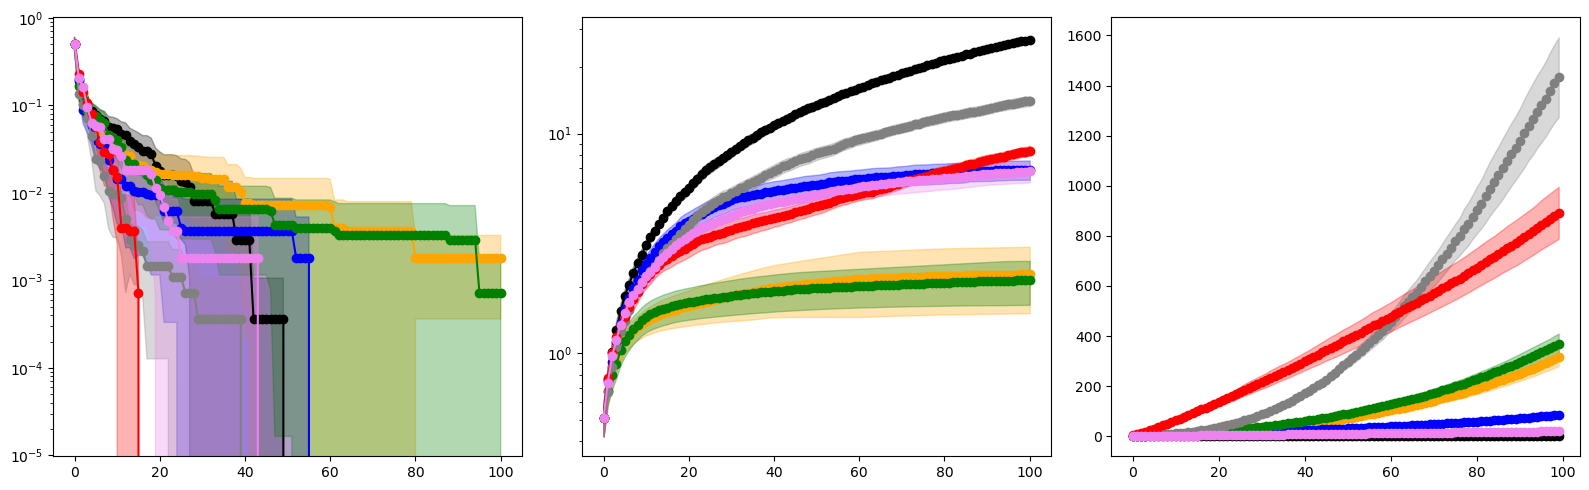

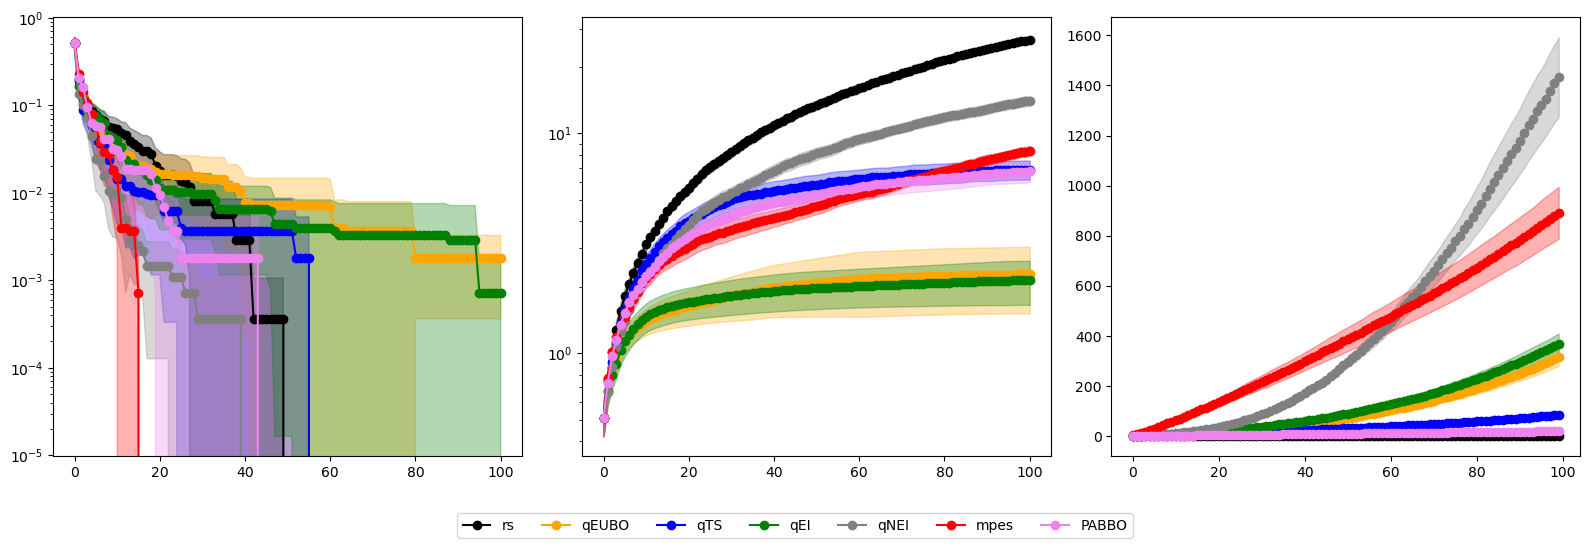

In [36]:
dataname = "sushi_old"
num_dataset=1

models = ["rs", "qEUBO", "qTS", "qEI", "qNEI", "mpes"]
results  = {}
for acq_function_type in models: 
    results[acq_function_type] = dict()
    results[acq_function_type]["simple_regret"]  = list()
    results[acq_function_type]["immediate_regret"] = list()
    results[acq_function_type]["cumulative_regret"] = list()
    results[acq_function_type]["inference_time"] = list()
    
    for dataset_id in range(num_dataset): 
        simple_regret, cumulative_regret, immediate_regret, inference_time = read_pbo_results(dataname=dataname, 
                                                                                              acq_function_type=acq_function_type, 
                                                                                              dataset_id=dataset_id, 
                                                                                              T=100)
        results[acq_function_type]["simple_regret"].append(simple_regret)
        results[acq_function_type]["cumulative_regret"].append(cumulative_regret)
        results[acq_function_type]["inference_time"].append(inference_time)
        results[acq_function_type]["immediate_regret"].append(immediate_regret)
    
    results[acq_function_type]["simple_regret"]  = torch.stack(results[acq_function_type]["simple_regret"], dim=1) # (num_seed, num_dataset, H)
    results[acq_function_type]["cumulative_regret"] = torch.stack(results[acq_function_type]["cumulative_regret"], dim=1)
    results[acq_function_type]["inference_time"] = torch.stack(results[acq_function_type]["inference_time"], dim=1)
    results[acq_function_type]["immediate_regret"] = torch.stack(results[acq_function_type]["immediate_regret"], dim=1)

pabbo = "PABBO_GP4D_T_64_old"

results["PABBO"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_512.pt", map_location="cpu")
results["PABBO"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_512.pt", map_location="cpu")
results["PABBO"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_512.pt", map_location="cpu")
results["PABBO"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_512.pt", map_location="cpu")

# for k in list(results.keys()): 
#     root = f'cleaned_results/{dataname}/{k}'
#     print(root)
#     if not os.path.exists(root):
#         os.mkdir(root)
#     torch.save(results[k]["simple_regret"].mean(dim=1), f"{root}/simple_regret.pt")
#     torch.save(results[k]["cumulative_regret"].mean(dim=1), f"{root}/cumulative_regret.pt")
#     torch.save(results[k]["inference_time"].mean(dim=1), f"{root}/inference_time.pt")
#     torch.save(results[k]["immediate_regret"].mean(dim=1), f"{root}/immediate_regret.pt")
    
plot_results(results)
fig = plt.figure(figsize=(16, 5))
plot_results(results, fig=fig, col=3, plot_time=True)
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(results), bbox_to_anchor=(0.5, -0.1))
plt.show()

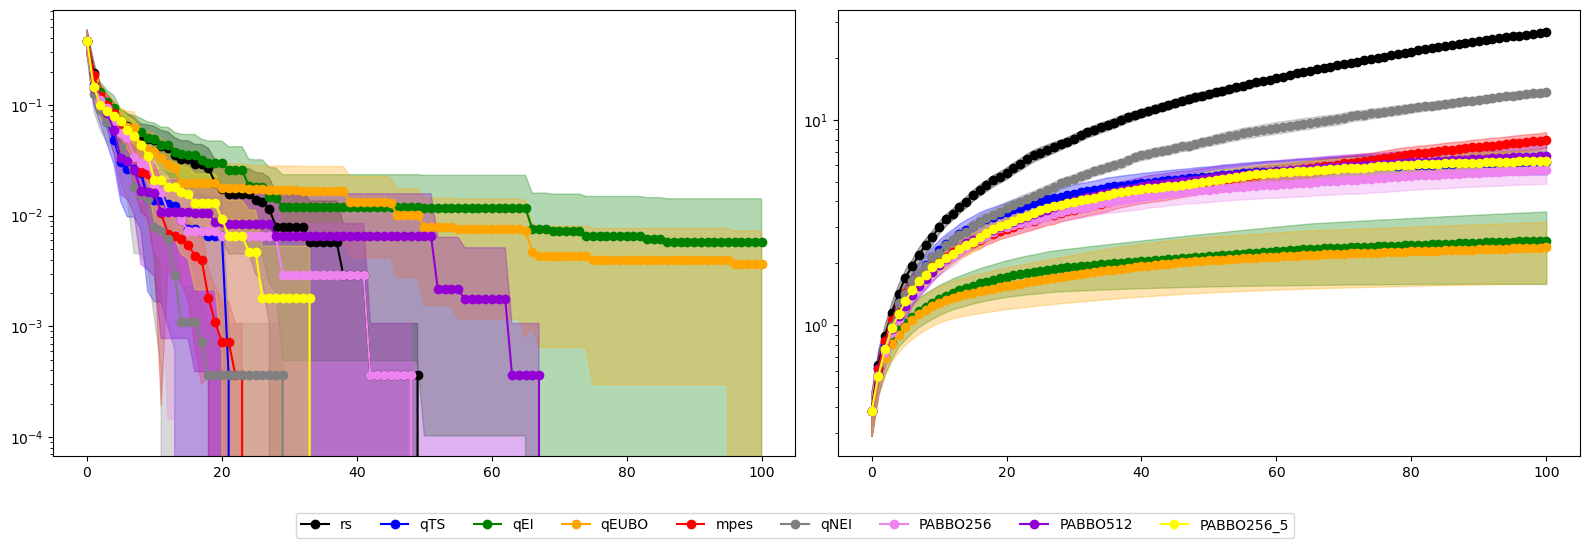

In [103]:
dataname = "sushi"
num_dataset=1

models = ["rs", "qTS", "qEI", "qEUBO", "mpes", "qNEI"]
results  = {}
for acq_function_type in models: 
    results[acq_function_type] = dict()
    results[acq_function_type]["simple_regret"]  = list()
    results[acq_function_type]["immediate_regret"] = list()
    results[acq_function_type]["cumulative_regret"] = list()
    results[acq_function_type]["inference_time"] = list()
    
    for dataset_id in range(num_dataset): 
        simple_regret, cumulative_regret, immediate_regret, inference_time = read_pbo_results(dataname=dataname, 
                                                                                              acq_function_type=acq_function_type, 
                                                                                              dataset_id=dataset_id, 
                                                                                              T=100)
        results[acq_function_type]["simple_regret"].append(simple_regret)
        results[acq_function_type]["cumulative_regret"].append(cumulative_regret)
        results[acq_function_type]["inference_time"].append(inference_time)
        results[acq_function_type]["immediate_regret"].append(immediate_regret)
    
    results[acq_function_type]["simple_regret"]  = torch.stack(results[acq_function_type]["simple_regret"], dim=1) # (num_seed, num_dataset, H)
    results[acq_function_type]["cumulative_regret"] = torch.stack(results[acq_function_type]["cumulative_regret"], dim=1)
    results[acq_function_type]["inference_time"] = torch.stack(results[acq_function_type]["inference_time"], dim=1)
    results[acq_function_type]["immediate_regret"] = torch.stack(results[acq_function_type]["immediate_regret"], dim=1)

pabbo = "PABBO_GP4D_T_64_old"

results["PABBO256"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO256"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_256.pt", map_location="cpu")
results["PABBO256"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_256.pt", map_location="cpu")
results["PABBO256"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_256.pt", map_location="cpu")
results["PABBO256"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_256.pt", map_location="cpu")

results["PABBO512"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO512"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_512.pt", map_location="cpu")
results["PABBO512"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_512.pt", map_location="cpu")
results["PABBO512"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_512.pt", map_location="cpu")
results["PABBO512"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_512.pt", map_location="cpu")


results["PABBO256_5"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO256_5"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_256_5.pt", map_location="cpu")
results["PABBO256_5"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_256_5.pt", map_location="cpu")
results["PABBO256_5"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_256_5.pt", map_location="cpu")
results["PABBO256_5"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_256_5.pt", map_location="cpu")


# for k in list(results.keys()): 
#     root = f'cleaned_results/{dataname}/{k}'
#     print(root)
#     if not os.path.exists(root):
#         os.mkdir(root)
#     torch.save(results[k]["simple_regret"].mean(dim=1), f"{root}/simple_regret.pt")
#     torch.save(results[k]["cumulative_regret"].mean(dim=1), f"{root}/cumulative_regret.pt")
#     torch.save(results[k]["inference_time"].mean(dim=1), f"{root}/inference_time.pt")
#     torch.save(results[k]["immediate_regret"].mean(dim=1), f"{root}/immediate_regret.pt")
    
# plot_results(results)
fig = plt.figure(figsize=(16, 5))
plot_results(results, fig=fig, col=2, plot_time=False)
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(results), bbox_to_anchor=(0.5, -0.1))
plt.show()

cleaned_results/HPOB7609/rs
cleaned_results/HPOB7609/qTS
cleaned_results/HPOB7609/qEI
cleaned_results/HPOB7609/qEUBO
cleaned_results/HPOB7609/qNEI
cleaned_results/HPOB7609/PABBO1024


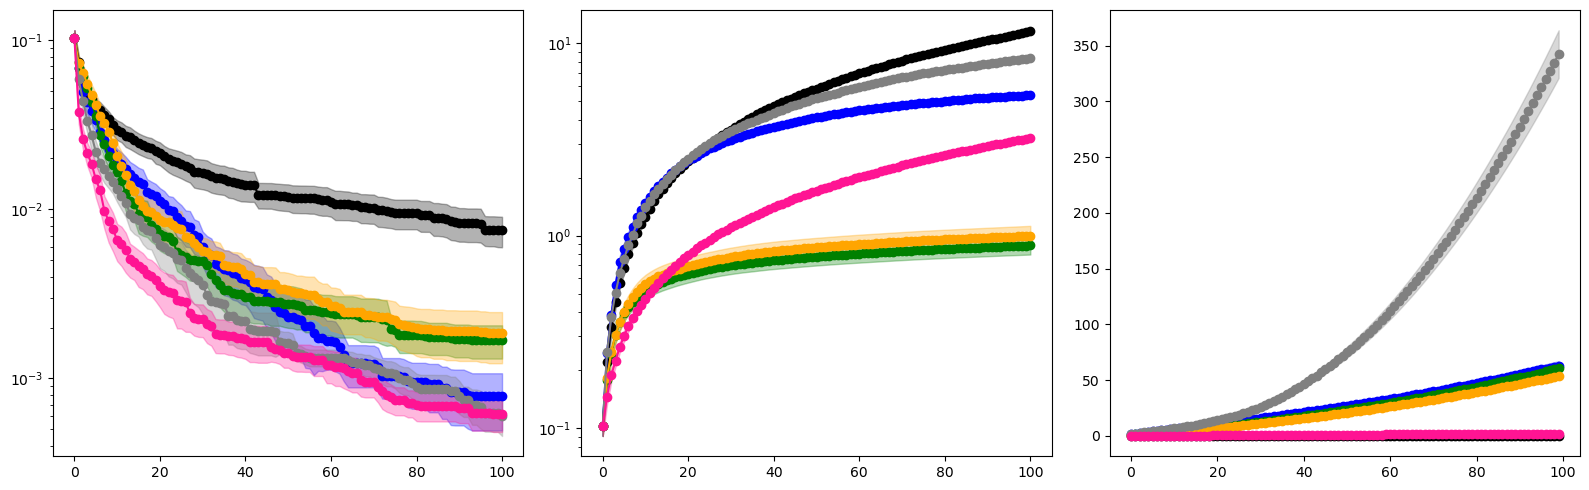

In [95]:
dataname = "HPOB7609"
num_dataset=7

models = ["rs", "qTS", "qEI", "qEUBO", "qNEI"]
# , "qTS"]
results  = {}
for acq_function_type in models: 
    results[acq_function_type] = dict()
    results[acq_function_type]["simple_regret"]  = list()
    results[acq_function_type]["immediate_regret"] = list()
    results[acq_function_type]["cumulative_regret"] = list()
    results[acq_function_type]["inference_time"] = list()
    
    for dataset_id in range(num_dataset): 
        simple_regret, cumulative_regret, immediate_regret, inference_time = read_pbo_results(dataname=dataname, 
                                                                                              acq_function_type=acq_function_type, 
                                                                                              dataset_id=dataset_id, 
                                                                                              T=100)
        results[acq_function_type]["simple_regret"].append(simple_regret)
        results[acq_function_type]["cumulative_regret"].append(cumulative_regret)
        results[acq_function_type]["inference_time"].append(inference_time)
        results[acq_function_type]["immediate_regret"].append(immediate_regret)
    
    results[acq_function_type]["simple_regret"]  = torch.stack(results[acq_function_type]["simple_regret"], dim=1) # (num_seed, num_dataset, H)
    results[acq_function_type]["cumulative_regret"] = torch.stack(results[acq_function_type]["cumulative_regret"], dim=1)
    results[acq_function_type]["inference_time"] = torch.stack(results[acq_function_type]["inference_time"], dim=1)
    results[acq_function_type]["immediate_regret"] = torch.stack(results[acq_function_type]["immediate_regret"], dim=1)

pabbo="PABBO_HPOB7609"
results["PABBO1024"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO1024"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET.pt", map_location="cpu")
results["PABBO1024"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME.pt", map_location="cpu")
results["PABBO1024"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET.pt", map_location="cpu")
results["PABBO1024"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET.pt", map_location="cpu")



for k in list(results.keys()): 
    root = f'cleaned_results/{dataname}/{k}'
    print(root)
    if not os.path.exists(root):
        os.mkdir(root)
    torch.save(results[k]["simple_regret"], f"{root}/simple_regret.pt")
    torch.save(results[k]["cumulative_regret"], f"{root}/cumulative_regret.pt")
    torch.save(results[k]["inference_time"], f"{root}/inference_time.pt")
    torch.save(results[k]["immediate_regret"], f"{root}/immediate_regret.pt")
    

plot_results(results)

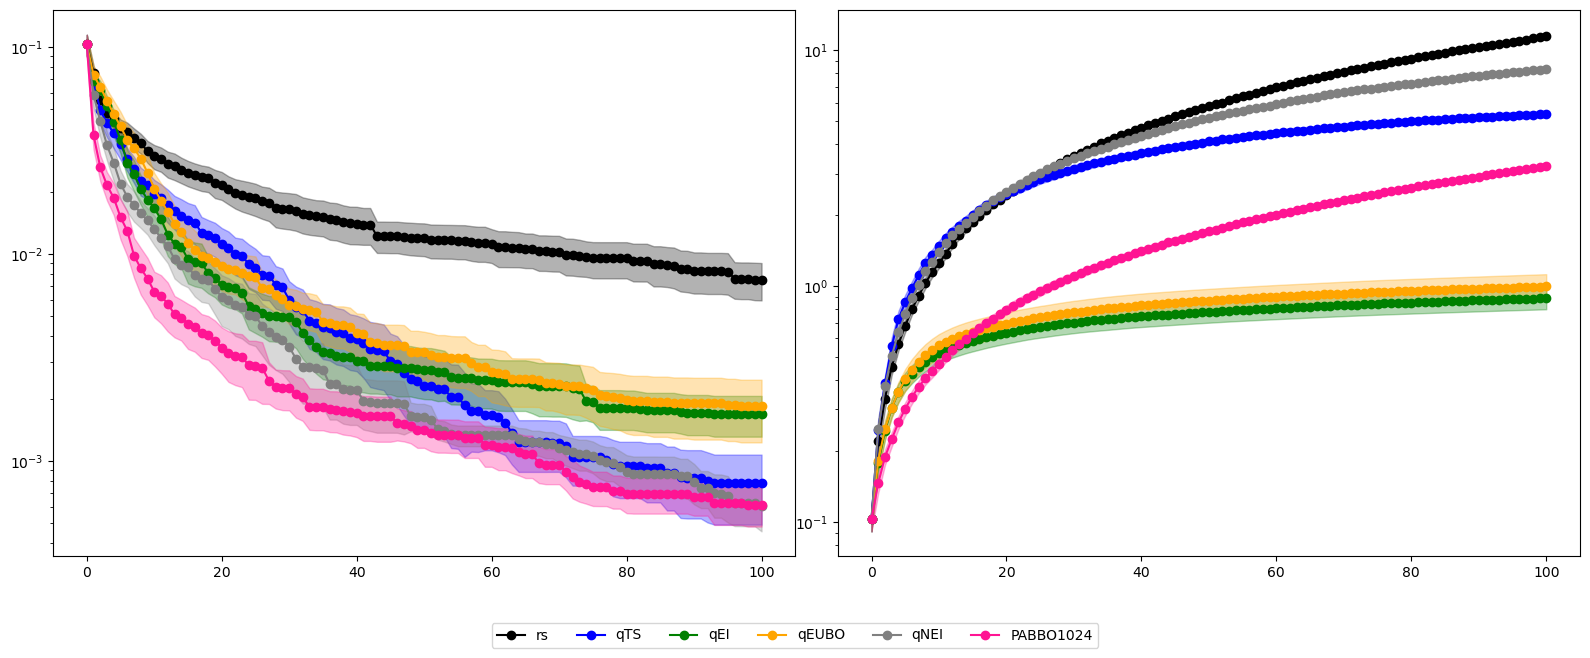

In [96]:
res = {}
model_names = list(results.keys())
for k in model_names:
    root = f'cleaned_results/HPOB7609/{k}'
    res[k]={}
    for filename in os.listdir(root):
        res[k][filename.split('.')[0]] = torch.load(f"{root}/{filename}", map_location="cpu")

fig = plt.figure(figsize=(16, 6))

# simple regret of shape (num_seeds, H)
ax = fig.add_subplot(1, 2, 1)
plot_metric_along_trajectory(metrics=[res[k]["simple_regret"].mean(dim=1) for k in model_names], 
                                 model_names=model_names,
                                 ax=ax)
ax.set_yscale("log")

# cumulative regret of shape (num_seeds, H)
ax = fig.add_subplot(1,2, 2)
plot_metric_along_trajectory(metrics=[res[k]["cumulative_regret"].mean(dim=1) for k in model_names],
                                 model_names=model_names,
                                 ax=ax)
ax.set_yscale("log")

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(res), bbox_to_anchor=(0.5, -0.1))
plt.show()

cleaned_results/HPOB5636/rs
cleaned_results/HPOB5636/qTS
cleaned_results/HPOB5636/qEI
cleaned_results/HPOB5636/qEUBO
cleaned_results/HPOB5636/qNEI
cleaned_results/HPOB5636/PABBO
cleaned_results/HPOB5636/PABBO_synthetic


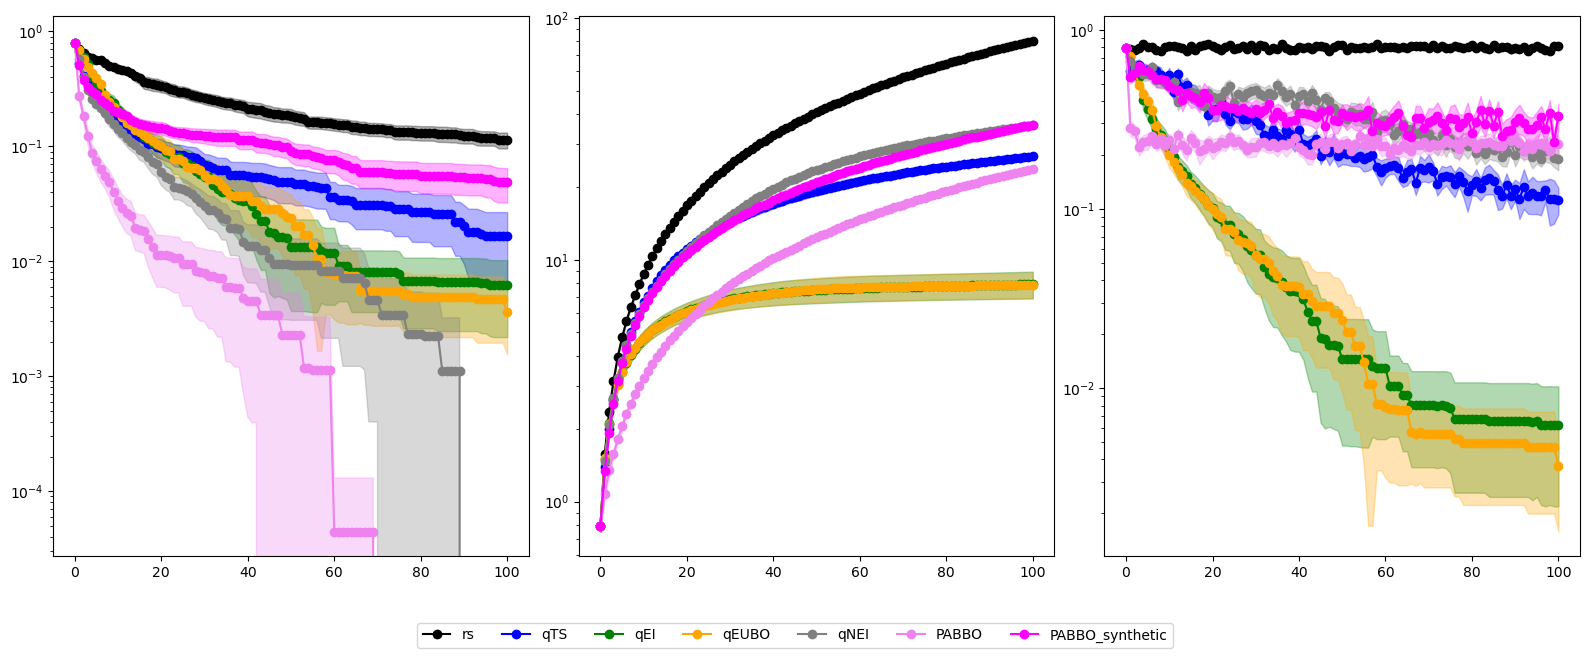

In [12]:
dataname = "HPOB5636"
num_dataset=6

models = ["rs", "qTS", "qEI", "qEUBO", "qNEI"]
# , "qTS"]
results  = {}
for acq_function_type in models: 
    results[acq_function_type] = dict()
    results[acq_function_type]["simple_regret"]  = list()
    results[acq_function_type]["immediate_regret"] = list()
    results[acq_function_type]["cumulative_regret"] = list()
    results[acq_function_type]["inference_time"] = list()
    
    for dataset_id in range(num_dataset): 
        simple_regret, cumulative_regret, immediate_regret, inference_time = read_pbo_results(dataname=dataname, 
                                                                                              acq_function_type=acq_function_type, 
                                                                                              dataset_id=dataset_id, 
                                                                                              T=100)
        results[acq_function_type]["simple_regret"].append(simple_regret)
        results[acq_function_type]["cumulative_regret"].append(cumulative_regret)
        results[acq_function_type]["inference_time"].append(inference_time)
        results[acq_function_type]["immediate_regret"].append(immediate_regret)
    
    results[acq_function_type]["simple_regret"]  = torch.stack(results[acq_function_type]["simple_regret"], dim=1) # (num_seed, num_dataset, H)
    results[acq_function_type]["cumulative_regret"] = torch.stack(results[acq_function_type]["cumulative_regret"], dim=1)
    results[acq_function_type]["inference_time"] = torch.stack(results[acq_function_type]["inference_time"], dim=1)
    results[acq_function_type]["immediate_regret"] = torch.stack(results[acq_function_type]["immediate_regret"], dim=1)

pabbo="PABBO_HPOB5636"
results["PABBO"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET.pt", map_location="cpu")
results["PABBO"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME.pt", map_location="cpu")
results["PABBO"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET.pt", map_location="cpu")
results["PABBO"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET.pt", map_location="cpu")

pabbo="PABBO_GP6D"
results["PABBO_synthetic"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO_synthetic"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET.pt", map_location="cpu")
results["PABBO_synthetic"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME.pt", map_location="cpu")
results["PABBO_synthetic"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET.pt", map_location="cpu")
results["PABBO_synthetic"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET.pt", map_location="cpu")

for k in list(results.keys()): 
    root = f'cleaned_results/{dataname}/{k}'
    print(root)
    if not os.path.exists(root):
        os.mkdir(root)
    torch.save(results[k]["simple_regret"], f"{root}/simple_regret.pt")
    torch.save(results[k]["cumulative_regret"], f"{root}/cumulative_regret.pt")
    torch.save(results[k]["inference_time"], f"{root}/inference_time.pt")
    torch.save(results[k]["immediate_regret"], f"{root}/immediate_regret.pt")
    
fig = plt.figure(figsize=(16, 6))
plot_results(results, fig=fig, col=3, plot_time=False)
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(results), bbox_to_anchor=(0.5, -0.1))
plt.show()

cleaned_results/HPOB5859/qNEI
cleaned_results/HPOB5859/rs
cleaned_results/HPOB5859/qTS
cleaned_results/HPOB5859/qEI
cleaned_results/HPOB5859/qEUBO
cleaned_results/HPOB5859/PABBO1024


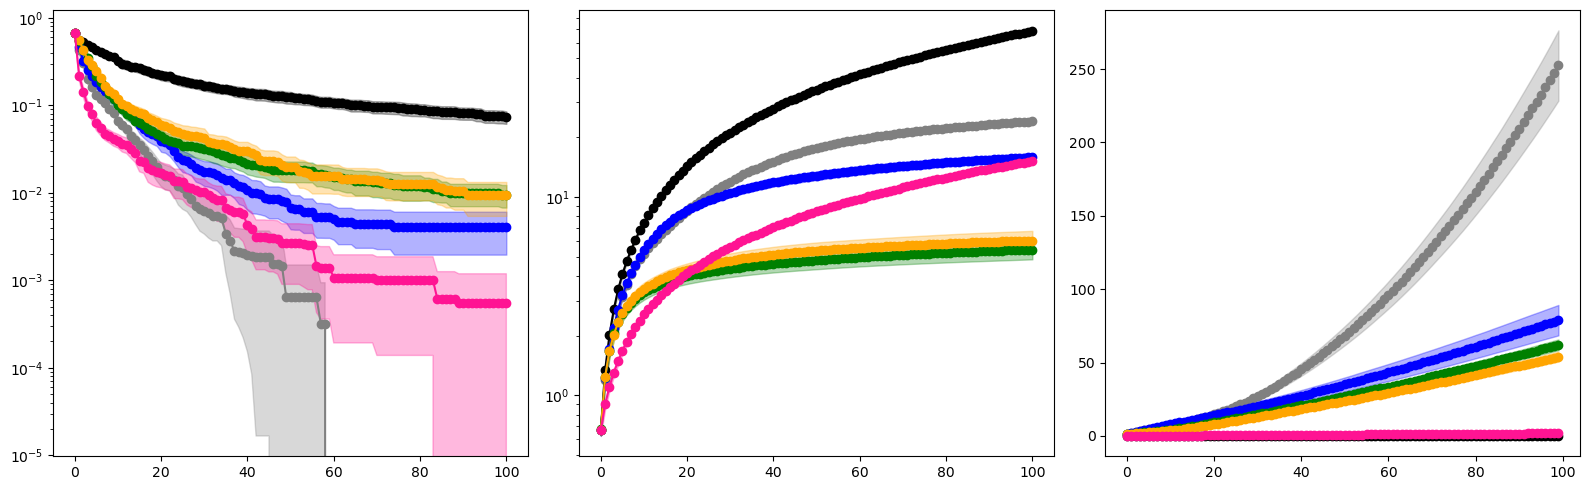

In [89]:
dataname = "HPOB5859"
num_dataset=6

models = ["qNEI", "rs", "qTS", "qEI", "qEUBO"]
# , "qTS"]
results  = {}
for acq_function_type in models: 
    results[acq_function_type] = dict()
    results[acq_function_type]["simple_regret"]  = list()
    results[acq_function_type]["immediate_regret"] = list()
    results[acq_function_type]["cumulative_regret"] = list()
    results[acq_function_type]["inference_time"] = list()
    
    for dataset_id in range(num_dataset): 
        simple_regret, cumulative_regret, immediate_regret, inference_time = read_pbo_results(dataname=dataname, 
                                                                                              acq_function_type=acq_function_type, 
                                                                                              dataset_id=dataset_id, 
                                                                                              T=100)
        results[acq_function_type]["simple_regret"].append(simple_regret)
        results[acq_function_type]["cumulative_regret"].append(cumulative_regret)
        results[acq_function_type]["inference_time"].append(inference_time)
        results[acq_function_type]["immediate_regret"].append(immediate_regret)
    
    results[acq_function_type]["simple_regret"]  = torch.stack(results[acq_function_type]["simple_regret"], dim=1) # (num_seed, num_dataset, H)
    results[acq_function_type]["cumulative_regret"] = torch.stack(results[acq_function_type]["cumulative_regret"], dim=1)
    results[acq_function_type]["inference_time"] = torch.stack(results[acq_function_type]["inference_time"], dim=1)
    results[acq_function_type]["immediate_regret"] = torch.stack(results[acq_function_type]["immediate_regret"], dim=1)


pabbo="PABBO_HPOB5859"
results["PABBO1024"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO1024"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET.pt", map_location="cpu")
results["PABBO1024"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME.pt", map_location="cpu")
results["PABBO1024"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET.pt", map_location="cpu")
results["PABBO1024"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET.pt", map_location="cpu")

for k in list(results.keys()): 
    root = f'cleaned_results/{dataname}/{k}'
    print(root)
    if not os.path.exists(root):
        os.mkdir(root)
    torch.save(results[k]["simple_regret"], f"{root}/simple_regret.pt")
    torch.save(results[k]["cumulative_regret"], f"{root}/cumulative_regret.pt")
    torch.save(results[k]["inference_time"], f"{root}/inference_time.pt")
    torch.save(results[k]["immediate_regret"], f"{root}/immediate_regret.pt")
    
plot_results(results)

cleaned_results/HPOB5971/qNEI
cleaned_results/HPOB5971/rs
cleaned_results/HPOB5971/qTS
cleaned_results/HPOB5971/qEI
cleaned_results/HPOB5971/qEUBO
cleaned_results/HPOB5971/PABBO1024


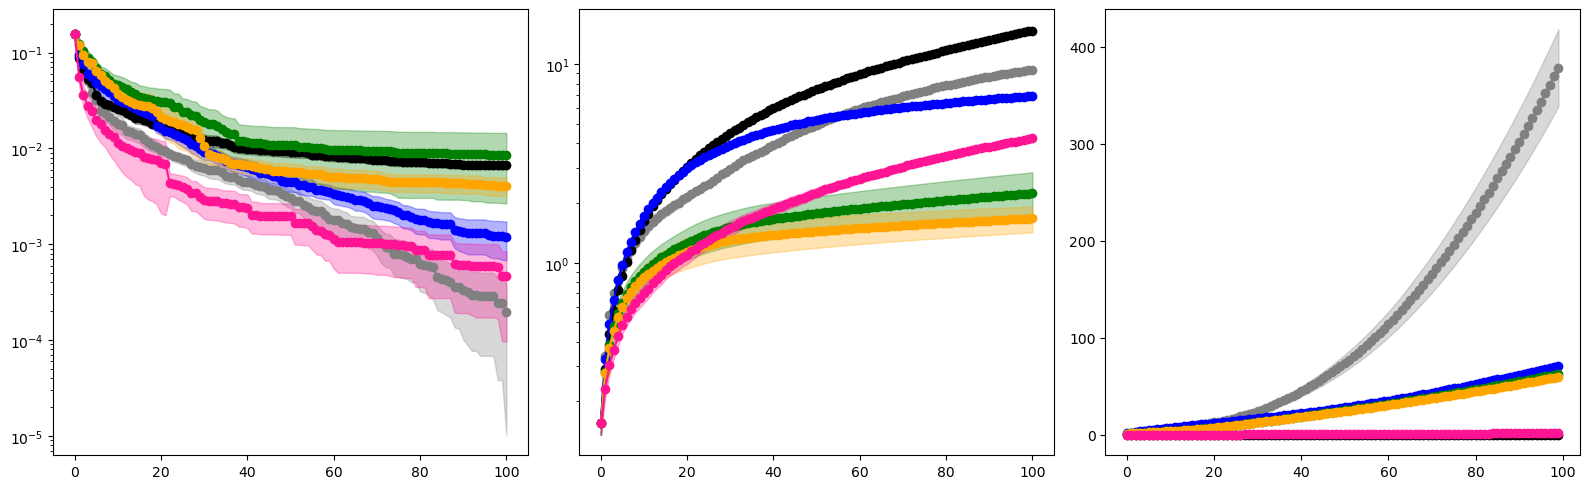

In [93]:
dataname = "HPOB5971"
num_dataset=6

models = ["qNEI", "rs", "qTS", "qEI", "qEUBO"]
# , "qTS"]
results  = {}
for acq_function_type in models: 
    results[acq_function_type] = dict()
    results[acq_function_type]["simple_regret"]  = list()
    results[acq_function_type]["immediate_regret"] = list()
    results[acq_function_type]["cumulative_regret"] = list()
    results[acq_function_type]["inference_time"] = list()
    
    for dataset_id in range(num_dataset): 
        simple_regret, cumulative_regret, immediate_regret, inference_time = read_pbo_results(dataname=dataname, 
                                                                                              acq_function_type=acq_function_type, 
                                                                                              dataset_id=dataset_id, 
                                                                                              T=100)
        results[acq_function_type]["simple_regret"].append(simple_regret)
        results[acq_function_type]["cumulative_regret"].append(cumulative_regret)
        results[acq_function_type]["inference_time"].append(inference_time)
        results[acq_function_type]["immediate_regret"].append(immediate_regret)
    
    results[acq_function_type]["simple_regret"]  = torch.stack(results[acq_function_type]["simple_regret"], dim=1) # (num_seed, num_dataset, H)
    results[acq_function_type]["cumulative_regret"] = torch.stack(results[acq_function_type]["cumulative_regret"], dim=1)
    results[acq_function_type]["inference_time"] = torch.stack(results[acq_function_type]["inference_time"], dim=1)
    results[acq_function_type]["immediate_regret"] = torch.stack(results[acq_function_type]["immediate_regret"], dim=1)

pabbo="PABBO_HPOB5971"
results["PABBO1024"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO1024"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET.pt", map_location="cpu")
results["PABBO1024"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME.pt", map_location="cpu")
results["PABBO1024"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET.pt", map_location="cpu")
results["PABBO1024"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET.pt", map_location="cpu")

for k in list(results.keys()): 
    root = f'cleaned_results/{dataname}/{k}'
    print(root)
    if not os.path.exists(root):
        os.mkdir(root)
    torch.save(results[k]["simple_regret"], f"{root}/simple_regret.pt")
    torch.save(results[k]["cumulative_regret"], f"{root}/cumulative_regret.pt")
    torch.save(results[k]["inference_time"], f"{root}/inference_time.pt")
    torch.save(results[k]["immediate_regret"], f"{root}/immediate_regret.pt")
    
plot_results(results)

rs tensor(17.6329, dtype=torch.float64)
qTS tensor(17.7873, dtype=torch.float64)
qEI tensor(13.0112, dtype=torch.float64)
mpes tensor(17.6306, dtype=torch.float64)
qEUBO tensor(14.8967, dtype=torch.float64)
qNEI tensor(16.1719, dtype=torch.float64)
PABBO256 tensor(9.5367e-07)
PABBO512 tensor(9.5367e-07)
PABBO1024 tensor(9.5367e-07)
PABBO256_5 tensor(9.5367e-07)


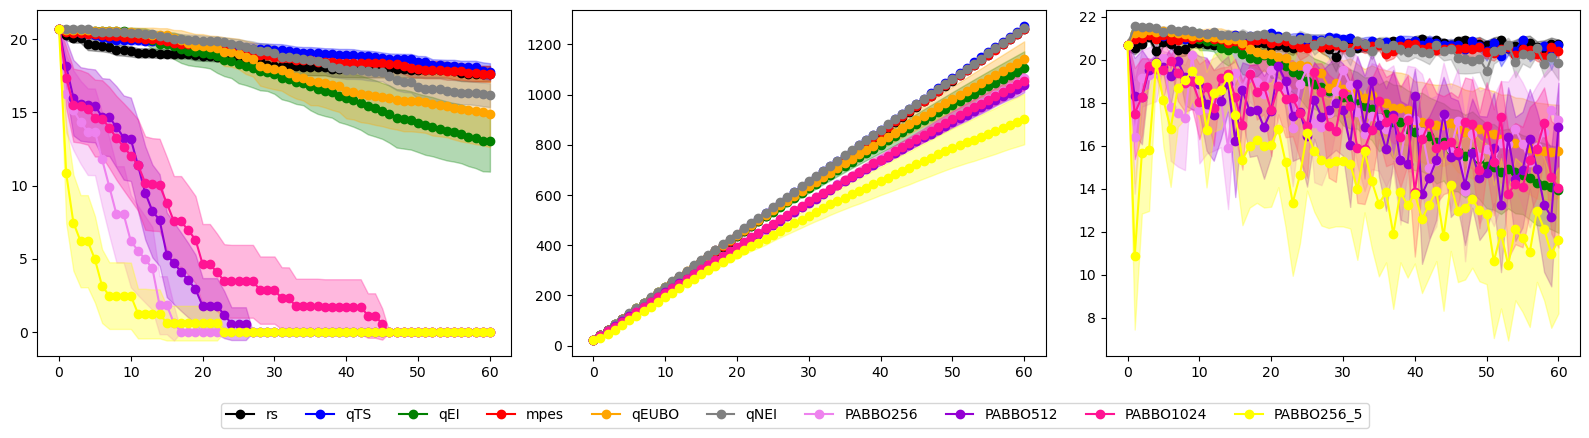

In [84]:
dataname = "ackley6D_old"
num_dataset=1

results  = {}
models = ["rs", "qTS", "qEI", "mpes", "qEUBO", "qNEI"]
# , "mpes"]
for acq_function_type in models: 
    results[acq_function_type] = dict()
    results[acq_function_type]["simple_regret"]  = list()
    results[acq_function_type]["immediate_regret"] = list()
    results[acq_function_type]["cumulative_regret"] = list()
    results[acq_function_type]["inference_time"] = list()
    
    for dataset_id in range(num_dataset): 
        simple_regret, cumulative_regret, immediate_regret, inference_time = read_pbo_results(dataname=dataname, 
                                                                                              acq_function_type=acq_function_type, 
                                                                                              dataset_id=dataset_id, 
                                                                                              T=60)
        results[acq_function_type]["simple_regret"].append(simple_regret)
        results[acq_function_type]["cumulative_regret"].append(cumulative_regret)
        results[acq_function_type]["inference_time"].append(inference_time)
        results[acq_function_type]["immediate_regret"].append(immediate_regret)
    
    results[acq_function_type]["simple_regret"]  = torch.stack(results[acq_function_type]["simple_regret"], dim=1) # (num_seed, num_dataset, H)
    results[acq_function_type]["cumulative_regret"] = torch.stack(results[acq_function_type]["cumulative_regret"], dim=1)
    results[acq_function_type]["inference_time"] = torch.stack(results[acq_function_type]["inference_time"], dim=1)
    results[acq_function_type]["immediate_regret"] = torch.stack(results[acq_function_type]["immediate_regret"], dim=1)
        

pabbo = "PABBO_GP6D"
results["PABBO256"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO256"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_256.pt", map_location="cpu")
results["PABBO256"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_256.pt", map_location="cpu")
results["PABBO256"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_256.pt", map_location="cpu")
results["PABBO256"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_256.pt", map_location="cpu")

results["PABBO512"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO512"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_512.pt", map_location="cpu")
results["PABBO512"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_512.pt", map_location="cpu")
results["PABBO512"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_512.pt", map_location="cpu")
results["PABBO512"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_512.pt", map_location="cpu")

results["PABBO1024"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO1024"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_1024.pt", map_location="cpu")
results["PABBO1024"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_1024.pt", map_location="cpu")
results["PABBO1024"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_1024.pt", map_location="cpu")
results["PABBO1024"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_1024.pt", map_location="cpu")

results["PABBO256_5"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO256_5"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_256_5.pt", map_location="cpu")
results["PABBO256_5"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_256_5.pt", map_location="cpu")
results["PABBO256_5"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_256_5.pt", map_location="cpu")
results["PABBO256_5"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_256_5.pt", map_location="cpu")

# for k in list(results.keys()): 
#     root = f'cleaned_results/{dataname}/{k}'
#     print(root)
#     if not os.path.exists(root):
#         os.mkdir(root)
#     torch.save(results[k]["simple_regret"].mean(dim=1), f"{root}/simple_regret.pt")
#     torch.save(results[k]["cumulative_regret"].mean(dim=1), f"{root}/cumulative_regret.pt")
#     torch.save(results[k]["inference_time"].mean(dim=1), f"{root}/inference_time.pt")
#     torch.save(results[k]["immediate_regret"].mean(dim=1), f"{root}/immediate_regret.pt")
    
for k in results: 
    print(k, results[k]["simple_regret"].squeeze(1).mean(dim=0)[..., -1])
fig = plt.figure(figsize=(16, 4))
plot_results(results, fig=fig, col=3, plot_time=False)
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(results), bbox_to_anchor=(0.5, -0.1))
plt.show()

cleaned_results/levy6D/rs
cleaned_results/levy6D/qTS
cleaned_results/levy6D/qEI
cleaned_results/levy6D/mpes
cleaned_results/levy6D/qEUBO
cleaned_results/levy6D/qNEI
cleaned_results/levy6D/PABBO256
cleaned_results/levy6D/PABBO512
cleaned_results/levy6D/PABBO1024
cleaned_results/levy6D/PABBO256_5
rs tensor(9.3400, dtype=torch.float64)
qTS tensor(8.5395, dtype=torch.float64)
qEI tensor(1.4750, dtype=torch.float64)
mpes tensor(8.0022, dtype=torch.float64)
qEUBO tensor(2.5126, dtype=torch.float64)
qNEI tensor(3.5671, dtype=torch.float64)
PABBO256 tensor(1.0792)
PABBO512 tensor(1.0792)
PABBO1024 tensor(1.0792)
PABBO256_5 tensor(1.0792)


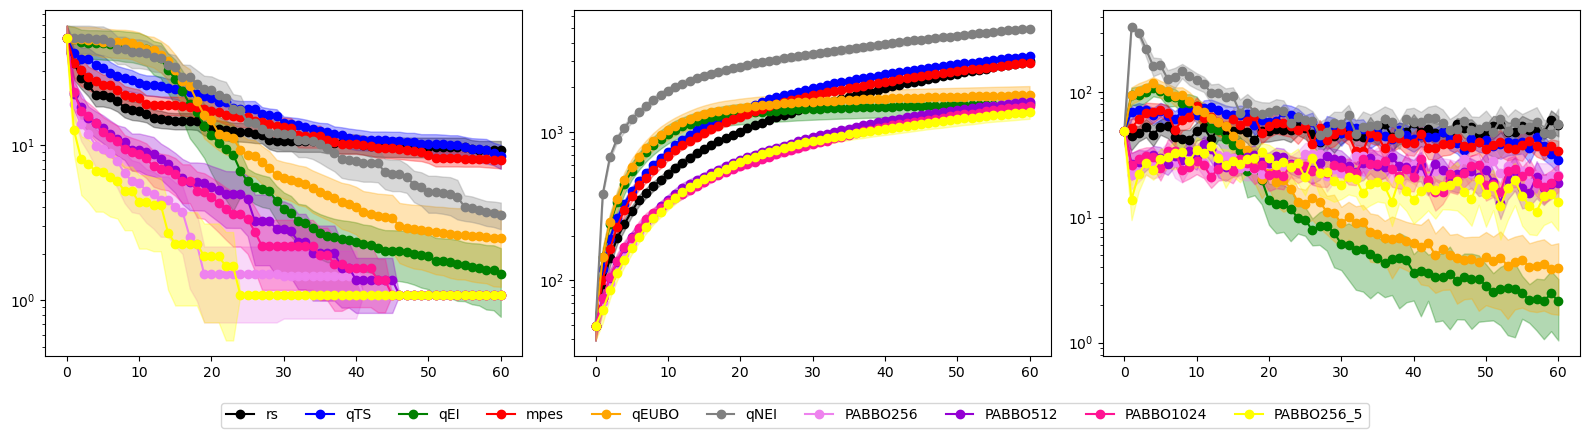

In [61]:
dataname = "levy6D"
num_dataset=1

results  = {}
models = ["rs", "qTS", "qEI", "mpes", "qEUBO", "qNEI"]
# , "mpes"]
for acq_function_type in models: 
    results[acq_function_type] = dict()
    results[acq_function_type]["simple_regret"]  = list()
    results[acq_function_type]["immediate_regret"] = list()
    results[acq_function_type]["cumulative_regret"] = list()
    results[acq_function_type]["inference_time"] = list()
    
    for dataset_id in range(num_dataset): 
        simple_regret, cumulative_regret, immediate_regret, inference_time = read_pbo_results(dataname=dataname, 
                                                                                              acq_function_type=acq_function_type, 
                                                                                              dataset_id=dataset_id, 
                                                                                              T=60)
        results[acq_function_type]["simple_regret"].append(simple_regret)
        results[acq_function_type]["cumulative_regret"].append(cumulative_regret)
        results[acq_function_type]["inference_time"].append(inference_time)
        results[acq_function_type]["immediate_regret"].append(immediate_regret)
    
    results[acq_function_type]["simple_regret"]  = torch.stack(results[acq_function_type]["simple_regret"], dim=1) # (num_seed, num_dataset, H)
    results[acq_function_type]["cumulative_regret"] = torch.stack(results[acq_function_type]["cumulative_regret"], dim=1)
    results[acq_function_type]["inference_time"] = torch.stack(results[acq_function_type]["inference_time"], dim=1)
    results[acq_function_type]["immediate_regret"] = torch.stack(results[acq_function_type]["immediate_regret"], dim=1)
        

pabbo = "PABBO_GP6D"
results["PABBO256"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO256"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_256.pt", map_location="cpu")
results["PABBO256"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_256.pt", map_location="cpu")
results["PABBO256"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_256.pt", map_location="cpu")
results["PABBO256"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_256.pt", map_location="cpu")

results["PABBO512"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO512"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_512.pt", map_location="cpu")
results["PABBO512"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_512.pt", map_location="cpu")
results["PABBO512"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_512.pt", map_location="cpu")
results["PABBO512"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_512.pt", map_location="cpu")

results["PABBO1024"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO1024"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_1024.pt", map_location="cpu")
results["PABBO1024"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_1024.pt", map_location="cpu")
results["PABBO1024"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_1024.pt", map_location="cpu")
results["PABBO1024"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_1024.pt", map_location="cpu")

results["PABBO256_5"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO256_5"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_256_5.pt", map_location="cpu")
results["PABBO256_5"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_256_5.pt", map_location="cpu")
results["PABBO256_5"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_256_5.pt", map_location="cpu")
results["PABBO256_5"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_256_5.pt", map_location="cpu")

for k in list(results.keys()): 
    root = f'cleaned_results/{dataname}/{k}'
    print(root)
    if not os.path.exists(root):
        os.mkdir(root)
    torch.save(results[k]["simple_regret"].mean(dim=1), f"{root}/simple_regret.pt")
    torch.save(results[k]["cumulative_regret"].mean(dim=1), f"{root}/cumulative_regret.pt")
    torch.save(results[k]["inference_time"].mean(dim=1), f"{root}/inference_time.pt")
    torch.save(results[k]["immediate_regret"].mean(dim=1), f"{root}/immediate_regret.pt")
    
for k in results: 
    print(k, results[k]["simple_regret"].squeeze(1).mean(dim=0)[..., -1])
fig = plt.figure(figsize=(16, 4))
plot_results(results, fig=fig, col=3, plot_time=False)
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(results), bbox_to_anchor=(0.5, -0.1))
plt.show()

PABBO512 tensor(1.4687)


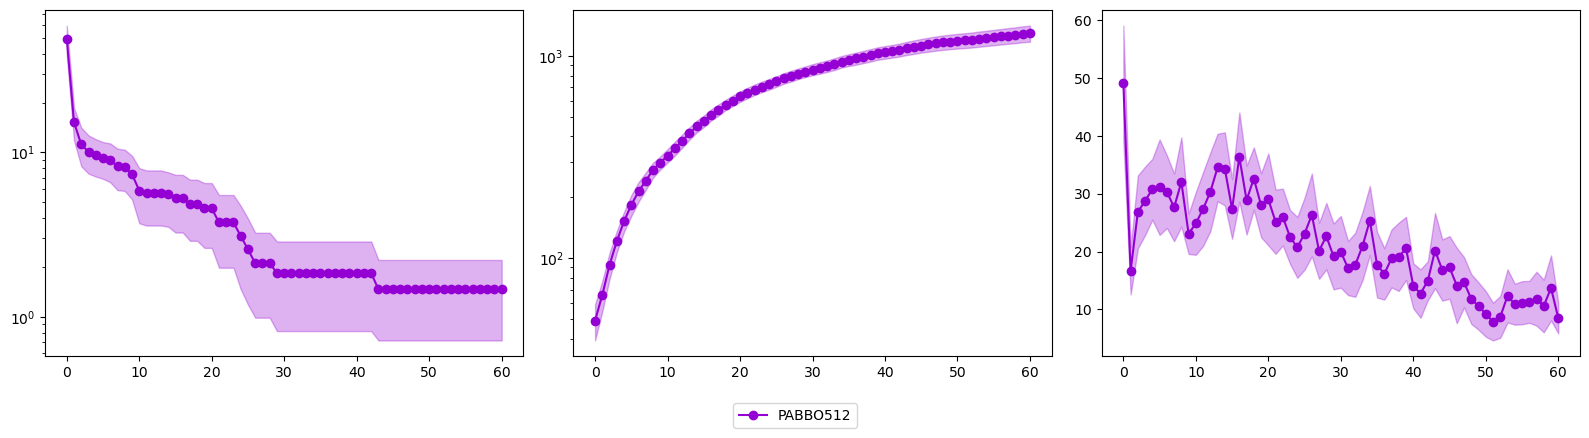

In [11]:
dataname = "levy6D"
num_dataset=1

results  = {}

pabbo = "PABBO_GP6D_st"
results["PABBO512"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO512"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_S512_B1.pt", map_location="cpu")
results["PABBO512"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_S512_B1.pt", map_location="cpu")
results["PABBO512"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_S512_B1.pt", map_location="cpu")
results["PABBO512"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_S512_B1.pt", map_location="cpu")

for k in results: 
    print(k, results[k]["simple_regret"].squeeze(1).mean(dim=0)[..., -1])
fig = plt.figure(figsize=(16, 4))
plot_results(results, fig=fig, col=3, plot_time=False)
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(results), bbox_to_anchor=(0.5, -0.1))
plt.show()

cleaned_results/rastrigin6D/rs
cleaned_results/rastrigin6D/qTS
cleaned_results/rastrigin6D/qEI
cleaned_results/rastrigin6D/mpes
cleaned_results/rastrigin6D/qEUBO
cleaned_results/rastrigin6D/qNEI
cleaned_results/rastrigin6D/PABBO256
cleaned_results/rastrigin6D/PABBO512
cleaned_results/rastrigin6D/PABBO1024
cleaned_results/rastrigin6D/PABBO256_5
rs tensor(50.4353, dtype=torch.float64)
qTS tensor(50.0690, dtype=torch.float64)
qEI tensor(44.8207, dtype=torch.float64)
mpes tensor(46.3706, dtype=torch.float64)
qEUBO tensor(37.1585, dtype=torch.float64)
qNEI tensor(48.0058, dtype=torch.float64)
PABBO256 tensor(1.8974)
PABBO512 tensor(1.8269)
PABBO1024 tensor(1.1429)
PABBO256_5 tensor(0.)


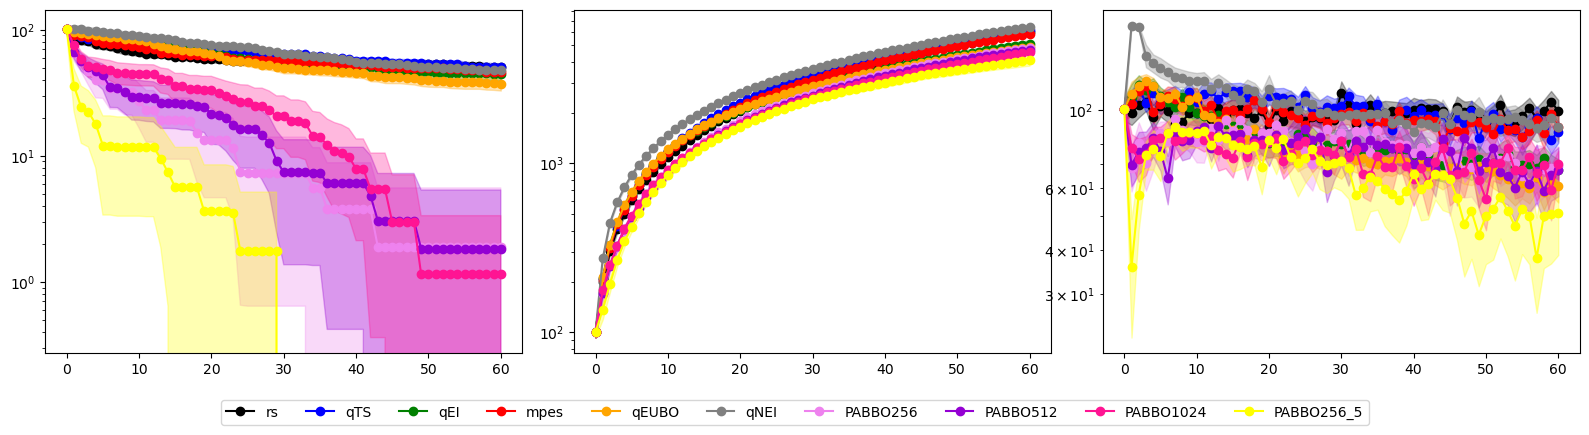

In [63]:
dataname = "rastrigin6D"
num_dataset=1

results  = {}
models = ["rs", "qTS", "qEI", "mpes", "qEUBO", "qNEI"]
# , "mpes"]
for acq_function_type in models: 
    results[acq_function_type] = dict()
    results[acq_function_type]["simple_regret"]  = list()
    results[acq_function_type]["immediate_regret"] = list()
    results[acq_function_type]["cumulative_regret"] = list()
    results[acq_function_type]["inference_time"] = list()
    
    for dataset_id in range(num_dataset): 
        simple_regret, cumulative_regret, immediate_regret, inference_time = read_pbo_results(dataname=dataname, 
                                                                                              acq_function_type=acq_function_type, 
                                                                                              dataset_id=dataset_id, 
                                                                                              T=60)
        results[acq_function_type]["simple_regret"].append(simple_regret)
        results[acq_function_type]["cumulative_regret"].append(cumulative_regret)
        results[acq_function_type]["inference_time"].append(inference_time)
        results[acq_function_type]["immediate_regret"].append(immediate_regret)
    
    results[acq_function_type]["simple_regret"]  = torch.stack(results[acq_function_type]["simple_regret"], dim=1) # (num_seed, num_dataset, H)
    results[acq_function_type]["cumulative_regret"] = torch.stack(results[acq_function_type]["cumulative_regret"], dim=1)
    results[acq_function_type]["inference_time"] = torch.stack(results[acq_function_type]["inference_time"], dim=1)
    results[acq_function_type]["immediate_regret"] = torch.stack(results[acq_function_type]["immediate_regret"], dim=1)
        

pabbo = "PABBO_GP6D"
results["PABBO256"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO256"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_256.pt", map_location="cpu")
results["PABBO256"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_256.pt", map_location="cpu")
results["PABBO256"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_256.pt", map_location="cpu")
results["PABBO256"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_256.pt", map_location="cpu")

results["PABBO512"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO512"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_512.pt", map_location="cpu")
results["PABBO512"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_512.pt", map_location="cpu")
results["PABBO512"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_512.pt", map_location="cpu")
results["PABBO512"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_512.pt", map_location="cpu")

results["PABBO1024"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO1024"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_1024.pt", map_location="cpu")
results["PABBO1024"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_1024.pt", map_location="cpu")
results["PABBO1024"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_1024.pt", map_location="cpu")
results["PABBO1024"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_1024.pt", map_location="cpu")

results["PABBO256_5"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO256_5"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_256_5.pt", map_location="cpu")
results["PABBO256_5"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_256_5.pt", map_location="cpu")
results["PABBO256_5"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_256_5.pt", map_location="cpu")
results["PABBO256_5"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_256_5.pt", map_location="cpu")

for k in list(results.keys()): 
    root = f'cleaned_results/{dataname}/{k}'
    print(root)
    if not os.path.exists(root):
        os.mkdir(root)
    torch.save(results[k]["simple_regret"].mean(dim=1), f"{root}/simple_regret.pt")
    torch.save(results[k]["cumulative_regret"].mean(dim=1), f"{root}/cumulative_regret.pt")
    torch.save(results[k]["inference_time"].mean(dim=1), f"{root}/inference_time.pt")
    torch.save(results[k]["immediate_regret"].mean(dim=1), f"{root}/immediate_regret.pt")
    
for k in results: 
    print(k, results[k]["simple_regret"].squeeze(1).mean(dim=0)[..., -1])
fig = plt.figure(figsize=(16, 4))
plot_results(results, fig=fig, col=3, plot_time=False)
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(results), bbox_to_anchor=(0.5, -0.1))
plt.show()

cleaned_results/rosenbrock6D/mpes
cleaned_results/rosenbrock6D/rs
cleaned_results/rosenbrock6D/qTS
cleaned_results/rosenbrock6D/qEUBO
cleaned_results/rosenbrock6D/qEI
cleaned_results/rosenbrock6D/qNEI
cleaned_results/rosenbrock6D/PABBO256
cleaned_results/rosenbrock6D/PABBO512
cleaned_results/rosenbrock6D/PABBO1024
cleaned_results/rosenbrock6D/PABBO256_5
mpes tensor(7200.2002, dtype=torch.float64)
rs tensor(10741.4251, dtype=torch.float64)
qTS tensor(3606.9032, dtype=torch.float64)
qEUBO tensor(187.5755, dtype=torch.float64)
qEI tensor(304.9541, dtype=torch.float64)
qNEI tensor(2492.4838, dtype=torch.float64)
PABBO256 tensor(4069.0386)
PABBO512 tensor(2206.9480)
PABBO1024 tensor(2206.9480)
PABBO256_5 tensor(4069.0386)


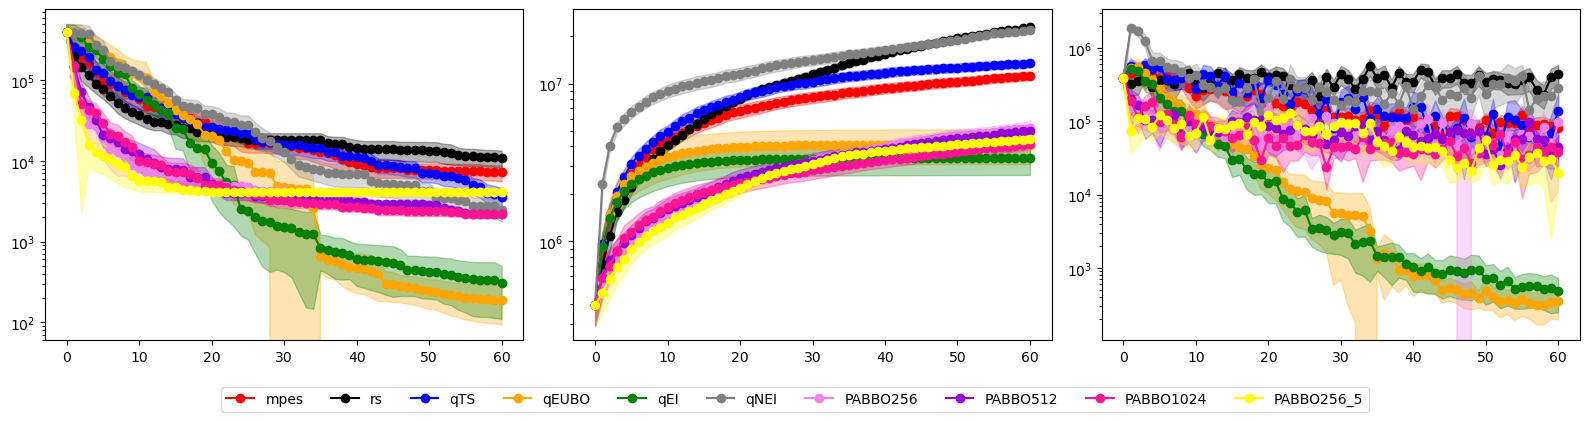

In [72]:
dataname = "rosenbrock6D"
num_dataset=1

results  = {}
models = ["mpes", "rs", "qTS", "qEUBO", "qEI", "qNEI"]
# , "qEI", "qEUBO", "mpes", "qNEI"]

for acq_function_type in models: 
    results[acq_function_type] = dict()
    results[acq_function_type]["simple_regret"]  = list()
    results[acq_function_type]["immediate_regret"] = list()
    results[acq_function_type]["cumulative_regret"] = list()
    results[acq_function_type]["inference_time"] = list()
    
    for dataset_id in range(num_dataset): 
        simple_regret, cumulative_regret, immediate_regret, inference_time = read_pbo_results(dataname=dataname, 
                                                                                              acq_function_type=acq_function_type, 
                                                                                              dataset_id=dataset_id, 
                                                                                              T=60)
        results[acq_function_type]["simple_regret"].append(simple_regret)
        results[acq_function_type]["cumulative_regret"].append(cumulative_regret)
        results[acq_function_type]["inference_time"].append(inference_time)
        results[acq_function_type]["immediate_regret"].append(immediate_regret)
    
    results[acq_function_type]["simple_regret"]  = torch.stack(results[acq_function_type]["simple_regret"], dim=1) # (num_seed, num_dataset, H)
    results[acq_function_type]["cumulative_regret"] = torch.stack(results[acq_function_type]["cumulative_regret"], dim=1)
    results[acq_function_type]["inference_time"] = torch.stack(results[acq_function_type]["inference_time"], dim=1)
    results[acq_function_type]["immediate_regret"] = torch.stack(results[acq_function_type]["immediate_regret"], dim=1)
        

pabbo = "PABBO_GP6D"
results["PABBO256"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO256"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_256.pt", map_location="cpu")
results["PABBO256"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_256.pt", map_location="cpu")
results["PABBO256"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_256.pt", map_location="cpu")
results["PABBO256"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_256.pt", map_location="cpu")

results["PABBO512"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO512"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_512.pt", map_location="cpu")
results["PABBO512"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_512.pt", map_location="cpu")
results["PABBO512"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_512.pt", map_location="cpu")
results["PABBO512"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_512.pt", map_location="cpu")

results["PABBO1024"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO1024"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_1024.pt", map_location="cpu")
results["PABBO1024"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_1024.pt", map_location="cpu")
results["PABBO1024"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_1024.pt", map_location="cpu")
results["PABBO1024"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_1024.pt", map_location="cpu")

results["PABBO256_5"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO256_5"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_256_5.pt", map_location="cpu")
results["PABBO256_5"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_256_5.pt", map_location="cpu")
results["PABBO256_5"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_256_5.pt", map_location="cpu")
results["PABBO256_5"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_256_5.pt", map_location="cpu")

for k in list(results.keys()): 
    root = f'cleaned_results/{dataname}/{k}'
    print(root)
    if not os.path.exists(root):
        os.mkdir(root)
    torch.save(results[k]["simple_regret"].mean(dim=1), f"{root}/simple_regret.pt")
    torch.save(results[k]["cumulative_regret"].mean(dim=1), f"{root}/cumulative_regret.pt")
    torch.save(results[k]["inference_time"].mean(dim=1), f"{root}/inference_time.pt")
    torch.save(results[k]["immediate_regret"].mean(dim=1), f"{root}/immediate_regret.pt")
    
for k in results: 
    print(k, results[k]["simple_regret"].squeeze(1).mean(dim=0)[..., -1])
fig = plt.figure(figsize=(16, 4))
plot_results(results, fig=fig, col=3, plot_time=False)
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(results), bbox_to_anchor=(0.5, -0.1))
plt.show()

PABBO512 tensor(1.0906)


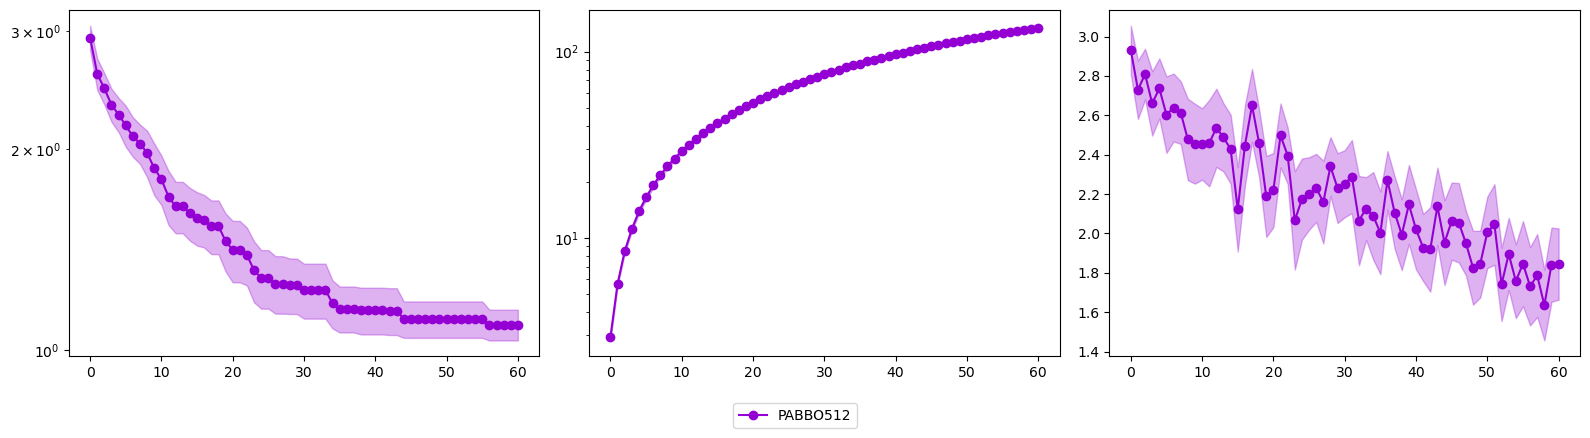

In [10]:
dataname = "hartmann6D"
num_dataset=1

results  = {}
models = ["rs", "qTS", "mpes", "qEI", "qNEI", "qEUBO"]
# , "qEI", "qEUBO", "mpes", "qNEI"]

# for acq_function_type in models: 
#     results[acq_function_type] = dict()
#     results[acq_function_type]["simple_regret"]  = list()
#     results[acq_function_type]["immediate_regret"] = list()
#     results[acq_function_type]["cumulative_regret"] = list()
#     results[acq_function_type]["inference_time"] = list()
    
#     for dataset_id in range(num_dataset): 
#         simple_regret, cumulative_regret, immediate_regret, inference_time = read_pbo_results(dataname=dataname, 
#                                                                                               acq_function_type=acq_function_type, 
#                                                                                               dataset_id=dataset_id, 
#                                                                                               T=60)
#         results[acq_function_type]["simple_regret"].append(simple_regret)
#         results[acq_function_type]["cumulative_regret"].append(cumulative_regret)
#         results[acq_function_type]["inference_time"].append(inference_time)
#         results[acq_function_type]["immediate_regret"].append(immediate_regret)
    
#     results[acq_function_type]["simple_regret"]  = torch.stack(results[acq_function_type]["simple_regret"], dim=1) # (num_seed, num_dataset, H)
#     results[acq_function_type]["cumulative_regret"] = torch.stack(results[acq_function_type]["cumulative_regret"], dim=1)
#     results[acq_function_type]["inference_time"] = torch.stack(results[acq_function_type]["inference_time"], dim=1)
#     results[acq_function_type]["immediate_regret"] = torch.stack(results[acq_function_type]["immediate_regret"], dim=1)
        

pabbo = "PABBO_GP6D_st"
# results["PABBO256"] = dict()
# root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
# results["PABBO256"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_256.pt", map_location="cpu")
# results["PABBO256"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_256.pt", map_location="cpu")
# results["PABBO256"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_256.pt", map_location="cpu")
# results["PABBO256"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_256.pt", map_location="cpu")

results["PABBO512"] = dict()
root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
results["PABBO512"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_S512_B1.pt", map_location="cpu")
results["PABBO512"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_S512_B1.pt", map_location="cpu")
results["PABBO512"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_S512_B1.pt", map_location="cpu")
results["PABBO512"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_S512_B1.pt", map_location="cpu")

# results["PABBO1024"] = dict()
# root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
# results["PABBO1024"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_1024.pt", map_location="cpu")
# results["PABBO1024"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_1024.pt", map_location="cpu")
# results["PABBO1024"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_1024.pt", map_location="cpu")
# results["PABBO1024"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_1024.pt", map_location="cpu")

# results["PABBO256_5"] = dict()
# root = f'results/evaluation/{dataname}/PABBO/{pabbo}'
# results["PABBO256_5"]["simple_regret"] =  torch.load(f"{root}/SIMPLE_REGRET_256_5.pt", map_location="cpu")
# results["PABBO256_5"]["inference_time"] = torch.load(f"{root}/CUMULATIVE_TIME_256_5.pt", map_location="cpu")
# results["PABBO256_5"]["cumulative_regret"] = torch.load(f"{root}/CUMULATIVE_REGRET_256_5.pt", map_location="cpu")
# results["PABBO256_5"]["immediate_regret"] = torch.load(f"{root}/IMMEDIATE_REGRET_256_5.pt", map_location="cpu")

# for k in list(results.keys()): 
#     root = f'cleaned_results/{dataname}/{k}'
#     print(root)
#     if not os.path.exists(root):
#         os.mkdir(root)
#     torch.save(results[k]["simple_regret"].mean(dim=1), f"{root}/simple_regret.pt")
#     torch.save(results[k]["cumulative_regret"].mean(dim=1), f"{root}/cumulative_regret.pt")
#     torch.save(results[k]["inference_time"].mean(dim=1), f"{root}/inference_time.pt")
#     torch.save(results[k]["immediate_regret"].mean(dim=1), f"{root}/immediate_regret.pt")
    
for k in results: 
    print(k, results[k]["simple_regret"].squeeze(1).mean(dim=0)[..., -1])
fig = plt.figure(figsize=(16, 4))
plot_results(results, fig=fig, col=3, plot_time=False)
handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(results), bbox_to_anchor=(0.5, -0.1))
plt.show()

We provide a minimal implementation of the source code to reproduce our ablation experiments on meta-training datasets. While we have tried our best to make the code as clear and instructive as possible within the limited time, we apologize for any potential oversights or errors.

**Dependencies**: `pip install -r requirements`

**Experiments**: To evaluate a specific PABBO model, you can use the `evaluate` function from `evaluate.py` as follows:

1. Command Line Execution. 
    
    Run the command:
    ```bash 
    python evaluate.py --model_name PABBO_RBF
    ```
    Here, `model_name` can be either "PABBO_RBF" or "PABBO_Mixture". For convenience, a batch script (`run.sh`) is also provided.

2. Notebook Execution. 
    
    Alternatively, you can execute this notebook. Note that this approach may take quite an amount of time.

Results will be saved in the directory `evaluation/results/model_name` and will include the following three files:

- `SIMPLE_REGRET.pt`
- `STEP_SIMPLE_REGRET.pt`
- `CUMULATIVE_REGRET.pt`

Each file contains a `torch.tensor` of shape `(num_seed, T)`, representing the regrets collected along the trajectory, averaged across tasks, and evaluated under different random seeds.


In [ ]:
override = False
if override: 
    SIMPLE_REGRET_RBF, SIMPLE_STEP_REGRET_RBF, CUMULATIVE_REGRET_RBF = evaluate(model_name="PABBO_RBF")
    SIMPLE_REGRET_Mixture, SIMPLE_STEP_REGRET_Mixture, CUMULATIVE_REGRET_Mixture = evaluate(model_name="PABBO_Mixture")
else: 
    SIMPLE_REGRET_RBF = torch.load("evaluation/results/PABBO_RBF/SIMPLE_REGRET.pt")
    CUMULATIVE_REGRET_RBF = torch.load("evaluation/results/PABBO_RBF/CUMULATIVE_REGRET.pt")
    SIMPLE_REGRET_Mixture = torch.load("evaluation/results/PABBO_Mixture/SIMPLE_REGRET.pt")
    CUMULATIVE_REGRET_Mixture = torch.load("evaluation/results/PABBO_Mixture/CUMULATIVE_REGRET.pt")

Plot the results:

In [ ]:
def confidence_interval(value: np.ndarray):
    return 1.96 * value.std(axis=0) / np.sqrt(value.shape[0])

def plot_trajectory_information(
    trajectories: Sequence[np.ndarray], 
    model_names: Sequence, 
    ax, 
):
    """plot optmimzation collected along trajectories.
    Args: 
        trajectories, list: a list of np.ndarray of shape (B, T).
        model_names, list: a list of model names.
    """
    M = len(trajectories)
    colors = cm.rainbow(np.linspace(0, 1, M))

    for i, (model_tra, c) in enumerate(zip(trajectories, colors)):
        x = np.arange(1, model_tra.shape[-1] + 1)
        mean = model_tra.mean(axis=0).flatten()
        ci = confidence_interval(model_tra)
        ax.plot(x, mean, "o-", color=c, label=f"{model_names[i]}")
        ax.fill_between(x, mean + ci, mean - ci, alpha=0.3, color=c)
        
    return ax


In [ ]:
SIMPLE_REGRET_TRA = [SIMPLE_REGRET_RBF, SIMPLE_REGRET_Mixture]
CUMULATIVE_REGRET_TRA = [CUMULATIVE_REGRET_RBF, CUMULATIVE_REGRET_Mixture]
model_names = ["PABBO RBF", "PABBO Mixture"]

fig = plt.figure(figsize=(15, 6))
ax = fig.add_subplot(1, 2, 1)
ax = plot_trajectory_information(SIMPLE_REGRET_TRA, model_names, ax)
ax.set_ylabel("Simple regret")
ax.set_xlabel("Step")
ax.set_yscale("log")
ax = fig.add_subplot(1, 2, 2)
ax = plot_trajectory_information(CUMULATIVE_REGRET_TRA, model_names, ax)
ax.set_yscale("log")
ax.set_ylabel("Cumulative regret")
ax.set_xlabel("Step")

# fig.suptitle("PABBO RBF v.s. PABBO Mixture")
handles, labels = fig.axes[0].get_legend_handles_labels()
fig.legend(handles, labels, ncol=len(labels), loc="lower center", bbox_to_anchor=(0.5, -0.05))
plt.tight_layout()
plt.show()